# Code

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline
import numpy as np
from scipy.signal import butter,filtfilt
from scipy import signal
from scipy.fft import fftshift

In [15]:
def preprocess_eeg_debugging_data(fn, pkg_interval=6, ch="ch1",slize=None):
    df = pd.read_csv(fn, skiprows=2)
    if(slize): df = df[slize[0]:slize[1]]
    df[ch] = df[ch].subtract(df[ch].mean())
    df["f_time"] = df.index*pkg_interval
    df.set_index(df["time"])
    #print(df)
    return df
    #return df.iloc[40000:70000]
def plot_eeg_debugging_data(fn,interval=6,ax=None, ylabel="muV",
                            time="f_time",ch="ch1",slize=None,
                            params={"enc":True,
                                    "enc_f":True,
                                    "pkg_loss":True,
                                    "title":True,
                                    "legend":True,
                                    "normalize":True}):
    
    df = preprocess_eeg_debugging_data(fn,interval,ch=ch,slize=slize)
    
    if (ax==None):
        fig, ax = plt.subplots(1,1, figsize=(9,5))

    df[f"{ch}N"] = df[f"{ch}"]
    
    if(params["normalize"]):
        sd = str(round(df[f"{ch}"].std(),1))
        df[f"{ch}N"] /= df[f"{ch}"].std()
        ylabel = f"[{sd} muV]"
        df.plot(y=f"{ch}N",x=time, ax=ax, label=f"{ch} normalized")
    else:
        df.plot(y=f"{ch}",x=time, ax=ax, label=f"{ch}")
        
    if params["enc"]: df.plot(y="enc_ch1", x=time, ax=ax, lw="2", label=f"Bitshift 1")
    if params["enc_f"]: df.plot(y="enc_flag", x=time, ax=ax, lw="2", label=f"Encoding Flag")
    if params["pkg_loss"]: df.plot(y="pkg_loss",x=time, ax=ax, lw="2", label="Pkg Loss")

    if params["title"]: ax.set_title(fn)
    ax.set_xlabel("ms")
    ax.set_ylabel(ylabel)
    if params["legend"]: ax.legend()
    plt.savefig(fn+"{}.png".format(str(i+1)))
    
    
    
def butter_lowpass_filter(data, cutoff, fs, order,nyq):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def plot_buttersworth(fn, cutoff,ax, title="Traumschreiber", filtered ="Unfiltered", ch="ch1",a=1200,b=1300):
    data = preprocess_eeg_debugging_data(fn,6)
    # Filter requirements.
    T = 5.0         # Sample Period
    fs = 167       # sample rate, Hz
    cutoff = cutoff    # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
    nyq = 0.5 * fs  # Nyquist Frequency
    order = 2       # sin wave can be approx represented as quadratic
    n = int(T * fs) # total number of samples

    y = butter_lowpass_filter(data[ch], cutoff, fs, order,nyq)
    y_slice = y[a:b]
    data_slice = data[a:b]

    data_slice.plot(y=ch,x="f_time",ax=ax, label=filtered)
    ax.plot(data_slice["f_time"],y_slice, lw=4, label=f"Filtered Fq:{cutoff}Hz")
    plt.gca().set_title(title)
    ax.legend()
    plt.savefig("23-03-2021_20-05-44_new ts1_5hz_5mvolt_5min__{}.png".format(str(i+1)))
    
def plot_spectrogram(fn,ch="ch1", ax=None, title=True, slize=None):
    x = preprocess_eeg_debugging_data(fn,6,ch, slize=slize)
    x = x[ch]
    f, t, Sxx = signal.spectrogram(x, 167)
    
    if ax==None:
        fig,ax = plt.subplots(1, figsize=(9,5))
        
    ax.pcolormesh(t, f, Sxx, shading='gouraud')
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    if title:
        ax.set_title("Spectrogram of "+ fn)
    plt.show()
    
def plot_spectrosignal(fn,ch="all", slize=None, figsize=(9,6)):
    fig, ax = plt.subplots(2,1, figsize=figsize)
    plot_eeg_debugging_data(fn,6,ch=ch,ax=ax[0],slize=slize)
    plot_spectrogram(fn,ch=ch, ax=ax[1], title=False, slize=slize)
    

# Plots

## January

### ```87 Hz, 5mV, 5Hz, 120s```

<ipython-input-15-b643ee51fc57>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1, figsize=(9,5))


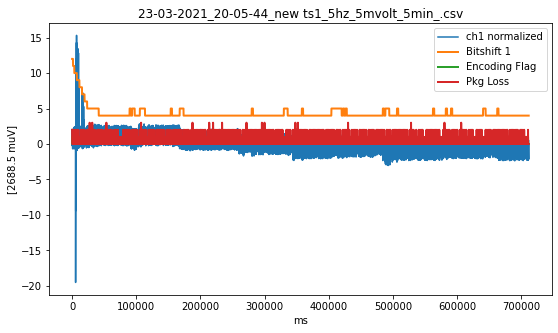

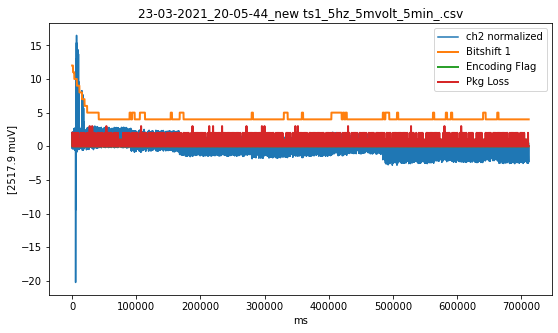

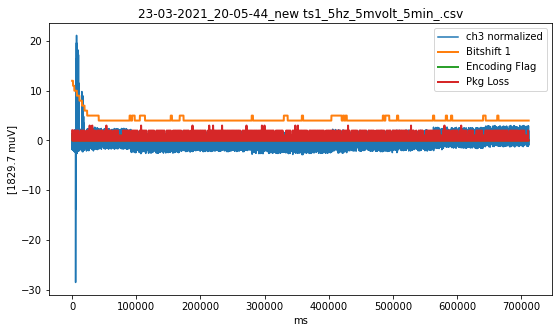

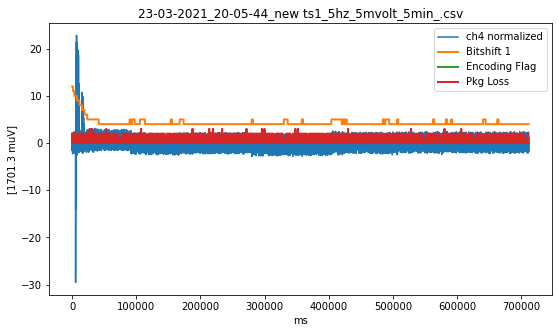

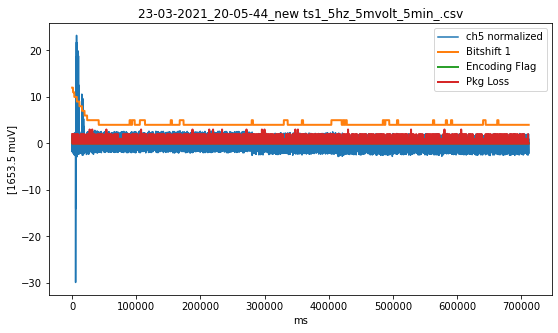

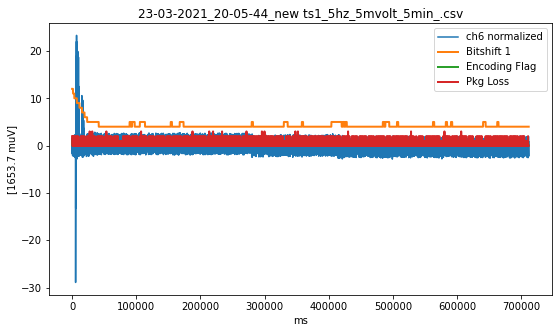

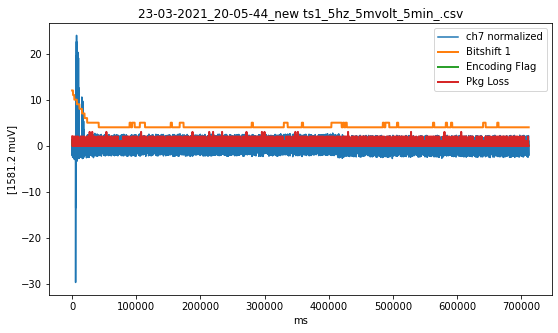

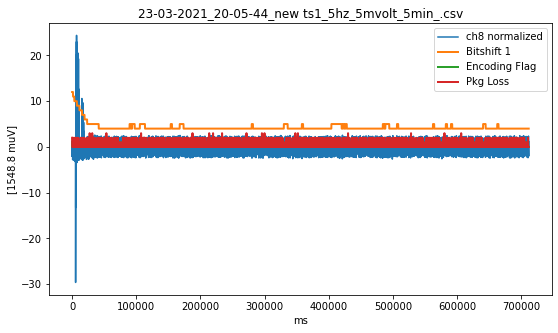

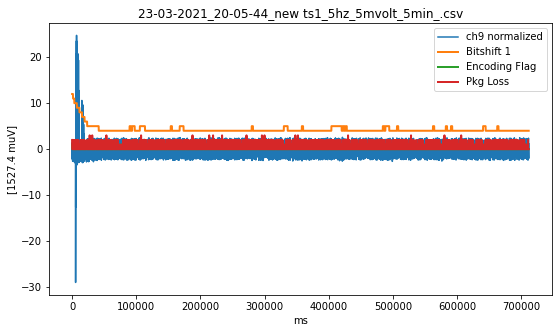

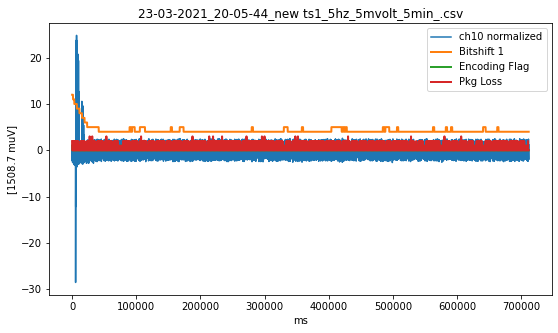

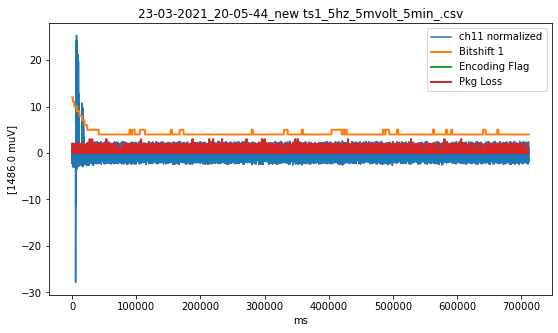

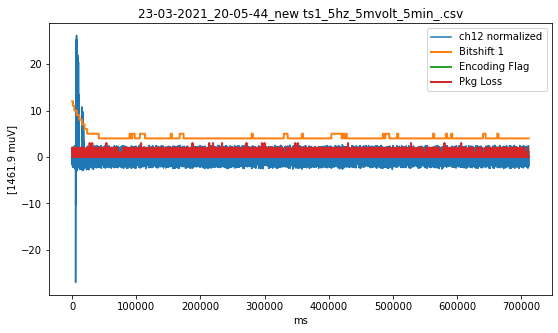

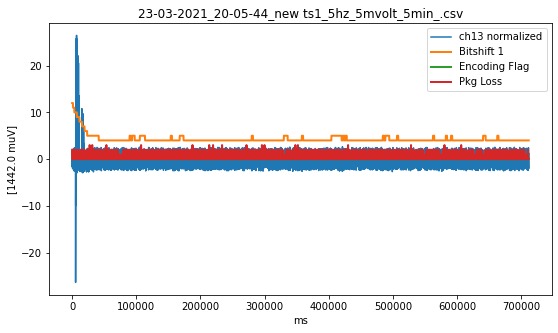

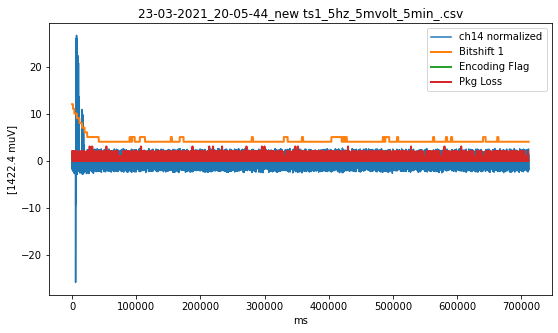

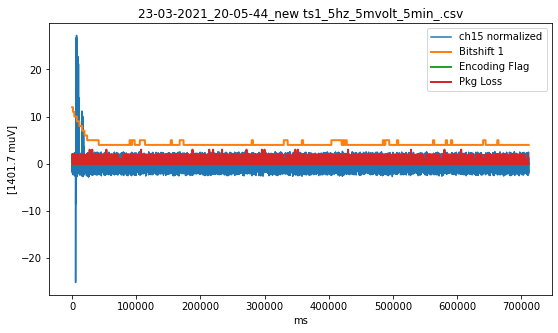

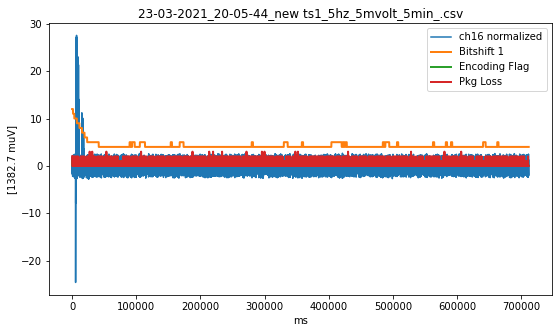

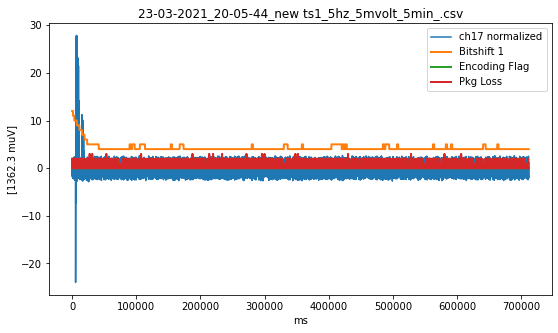

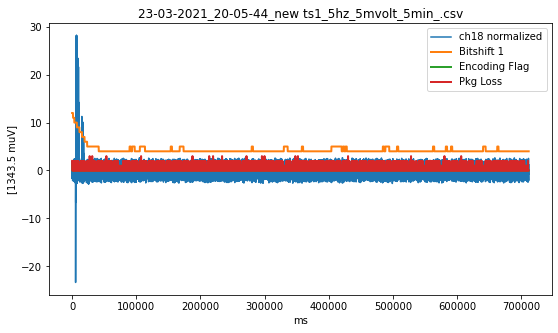

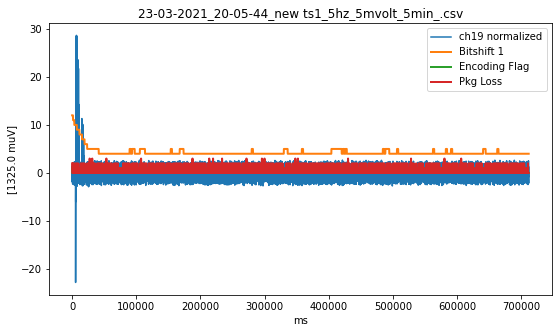

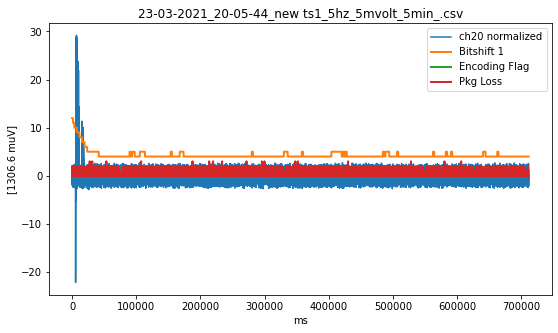

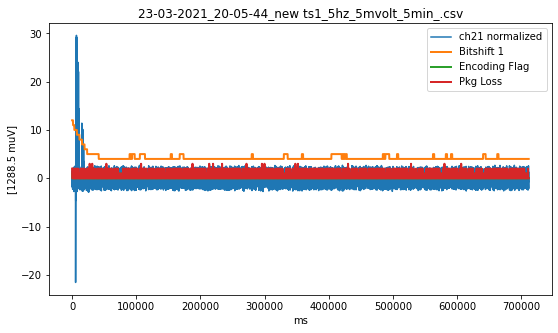

In [16]:
for i in range(21): 
    plot_eeg_debugging_data(fn= "23-03-2021_20-05-44_new ts1_5hz_5mvolt_5min_.csv", ch = "ch{}".format(str(i+1)), interval = 12)
    

### ```167Hz, 5mV, 5Hz, 120s```

<IPython.core.display.Javascript object>


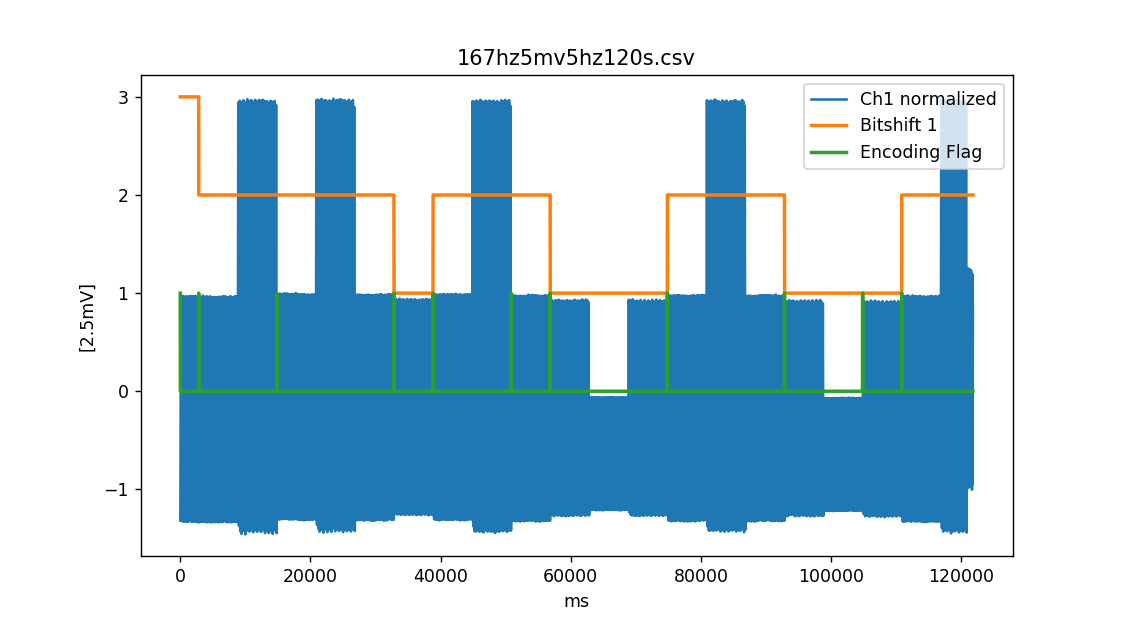

In [31]:
plot_eeg_debugging_data(fn= "167hz5mv5hz120s.csv", interval = 6)

### ```167 Hz, 4mV, 5Hz, 120s```

<IPython.core.display.Javascript object>


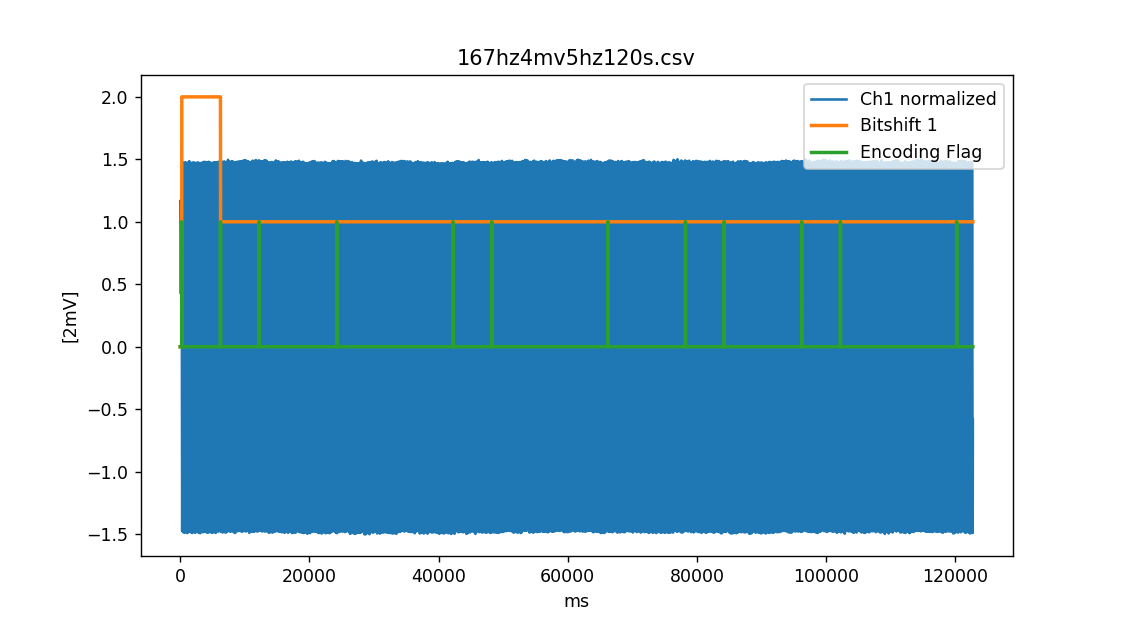

In [32]:
plot_eeg_debugging_data(fn= "167hz4mv5hz120s.csv", interval = 6, ylabel="[2mV]")

### ```167 Hz, 4.8mV, 5Hz, 120s```

In [ ]:
plot_eeg_debugging_data(fn= "167hz4_8mv5hz120s.csv", interval = 6, ylabel="[2.4mV]")

### ```167 Hz, 4.4mV, 5Hz, 120s```

In [ ]:
plot_eeg_debugging_data(fn= "167hz4_4mv5hz120s.csv", interval = 6, ylabel="[2.2mV]")

### ```167 Hz, 4mV, 5Hz, 120s, 2nd Recording```

In [ ]:
plot_eeg_debugging_data(fn= "167hz4mv5hz120sR2.csv", interval = 6, ylabel="[2mV]")

### ```167 Hz, 4mV, Frequencies:[20Hz,15Hz,10Hz,5Hz] Changer after 30s, 120s```

In [ ]:
plot_eeg_debugging_data(fn= "167hz4mvmixed120s.csv", interval = 6, ylabel="[2mV]")

### ```167 Hz, 4mV, Frequencies:[20Hz,15Hz,10Hz,5Hz] Changer after 30s, 120s```

<IPython.core.display.Javascript object>


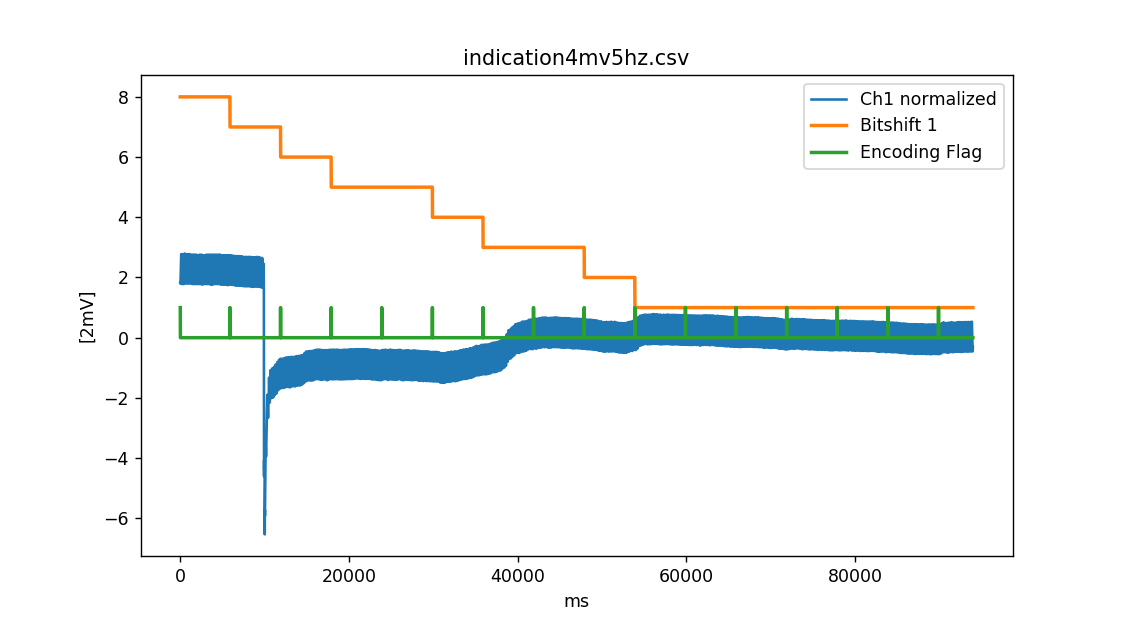

In [5]:
plot_eeg_debugging_data(fn= "indication4mv5hz.csv", interval = 6, ylabel="[2mV]")

### ```167 Hz, 4mV, Frequencies:[20Hz,15Hz,10Hz,5Hz] Changer after 30s, 120s```

<IPython.core.display.Javascript object>


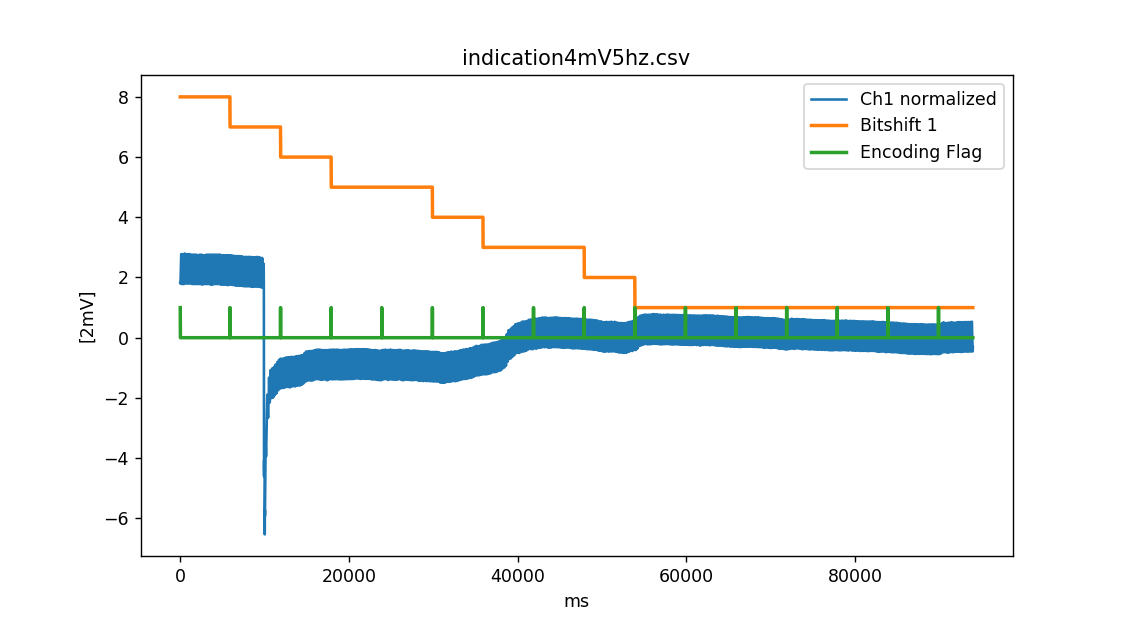

In [6]:
plot_eeg_debugging_data(fn= "indication4mV5hz.csv", interval = 6, ylabel="[2mV]")

### ```167 Hz, 4mV, 4Hz, Indications, Each Channel 5s, 390s, January 25th 2021```

<IPython.core.display.Javascript object>


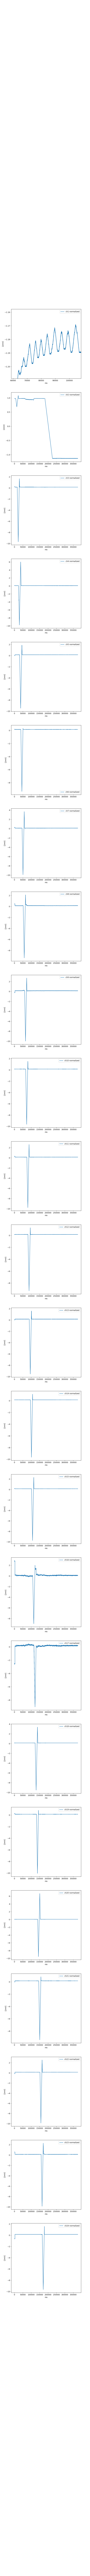

In [3]:
fig, axes = plt.subplots(24,figsize=(7,200))
for i,axis in enumerate(axes):
    channel = f"ch{i+1}"
    
    plot_eeg_debugging_data(fn= "4mv4hz390s_5s_each.csv",
                            interval = 6,
                            ylabel="[2mV]",
                            ax=axis,
                            ch=channel,
                            params={"enc":False,"enc_f":False,"title":False,"legend":False}
                           )
    

### ```167 Hz, 4mV, 4Hz, Notifications, Each Channel 10s,  January 29th 2021```

<IPython.core.display.Javascript object>


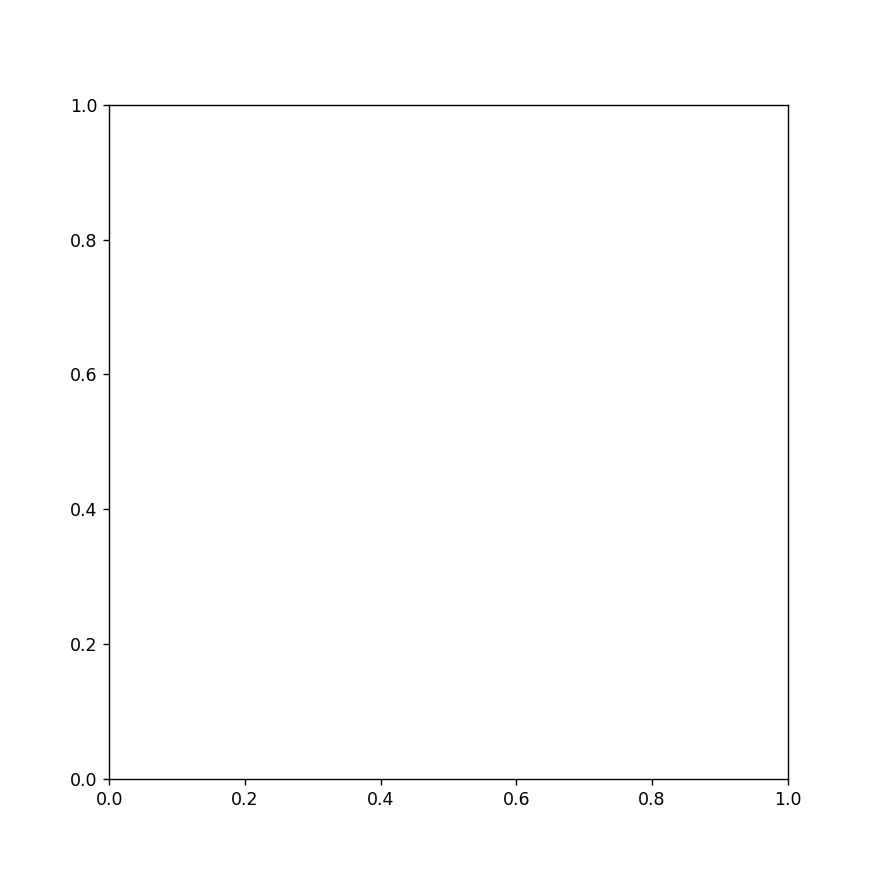

TypeError: 'AxesSubplot' object is not iterable

In [47]:
fig, axes = plt.subplots(1,figsize=(7,7))
for i,axis in enumerate(axes):
    channel = f"ch{i+1}"
    
    plot_eeg_debugging_data(fn= "4-4-10s-all.csv",
                            interval = 6,
                            ylabel="[2mV]",
                            ax=axis,
                            ch=channel,
                            params={"enc":False,"enc_f":False,"title":False,"legend":False}
                           )
    

## February

### ```167 Hz, 4mV, 5Hz, Indications, Each Channel 10s,  February 1st 2021```

<IPython.core.display.Javascript object>


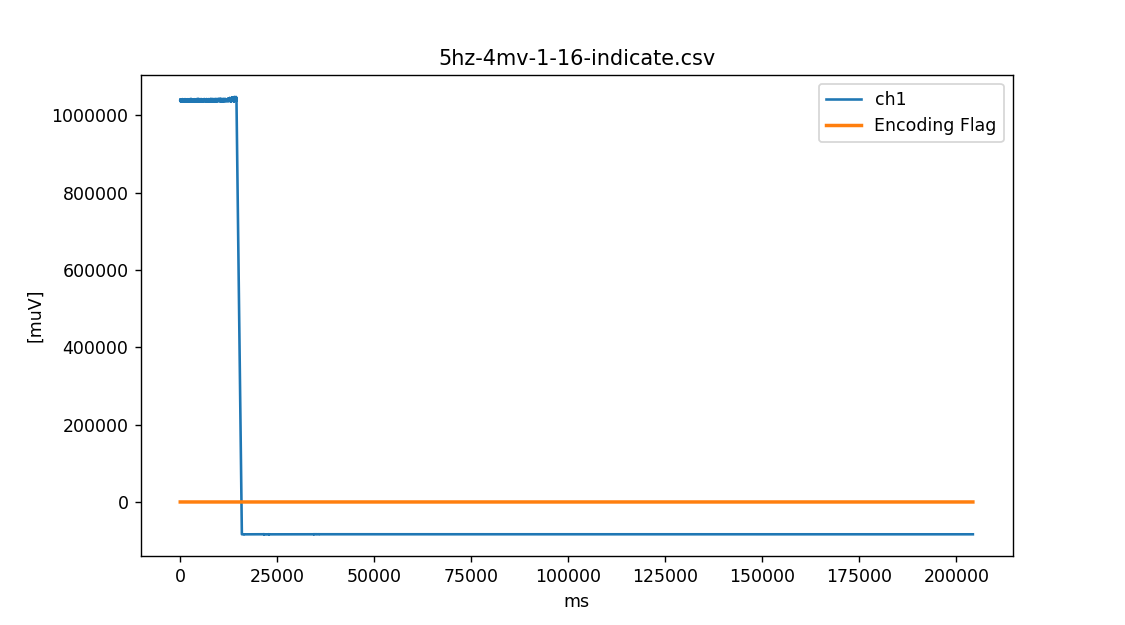

In [42]:
fig, ax = plt.subplots(1,figsize=(9,5))
chN = 1

plot_eeg_debugging_data(fn= "5hz-4mv-1-16-indicate.csv",
                        interval = 6,
                        ylabel="[muV]",
                        ax=ax,
                        ch=f"ch{chN}",
                        params={"enc":False,"enc_f":True,"title":True,"legend":False,"normalize":False}
                       )

<IPython.core.display.Javascript object>


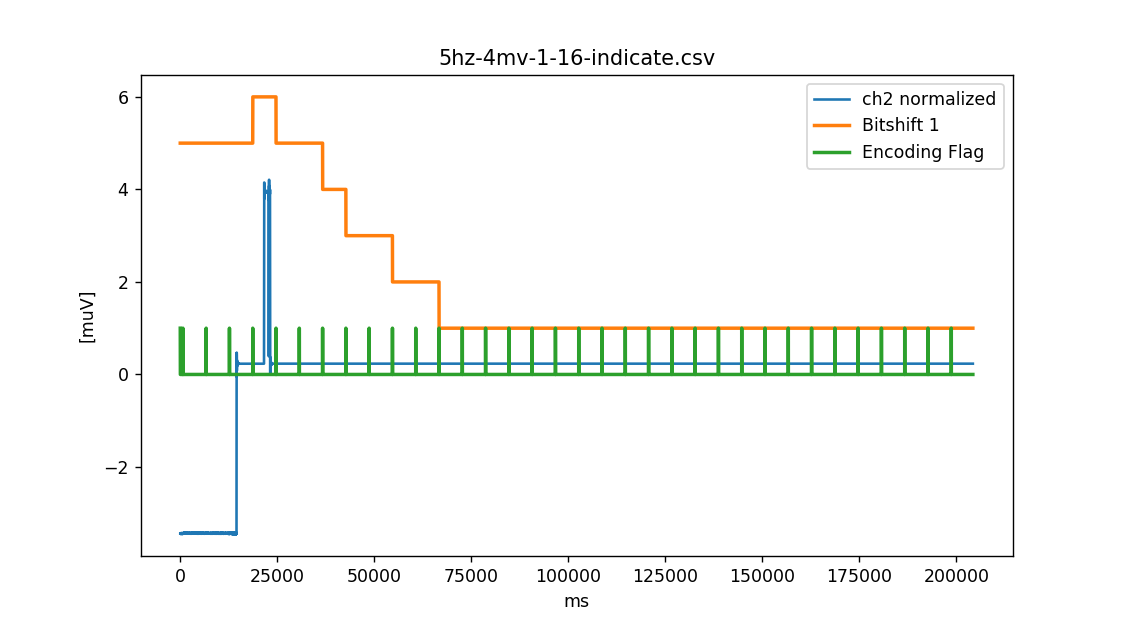

In [43]:
fig, ax = plt.subplots(1,figsize=(9,5))
chN = 2

plot_eeg_debugging_data(fn= "5hz-4mv-1-16-indicate.csv",
                        interval = 6,
                        ylabel="[muV]",
                        ax=ax,
                        ch=f"ch{chN}",
                        params={"enc":True,"enc_f":True,"title":True,"legend":False,"normalize":True}
                       )

<IPython.core.display.Javascript object>


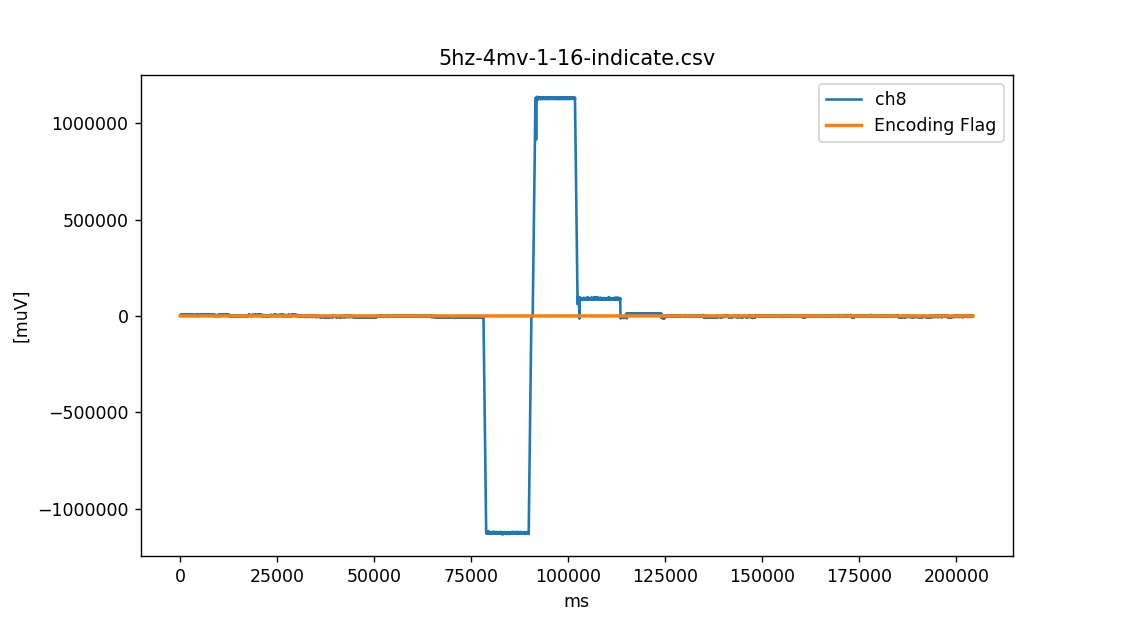

In [44]:
fig, ax = plt.subplots(1,figsize=(9,5))
chN = 8

plot_eeg_debugging_data(fn= "5hz-4mv-1-16-indicate.csv",
                        interval = 6,
                        ylabel="[muV]",
                        ax=ax,
                        ch=f"ch{chN}",
                        params={"enc":False,"enc_f":True,"title":True,"legend":False,"normalize":False}
                       )

<IPython.core.display.Javascript object>


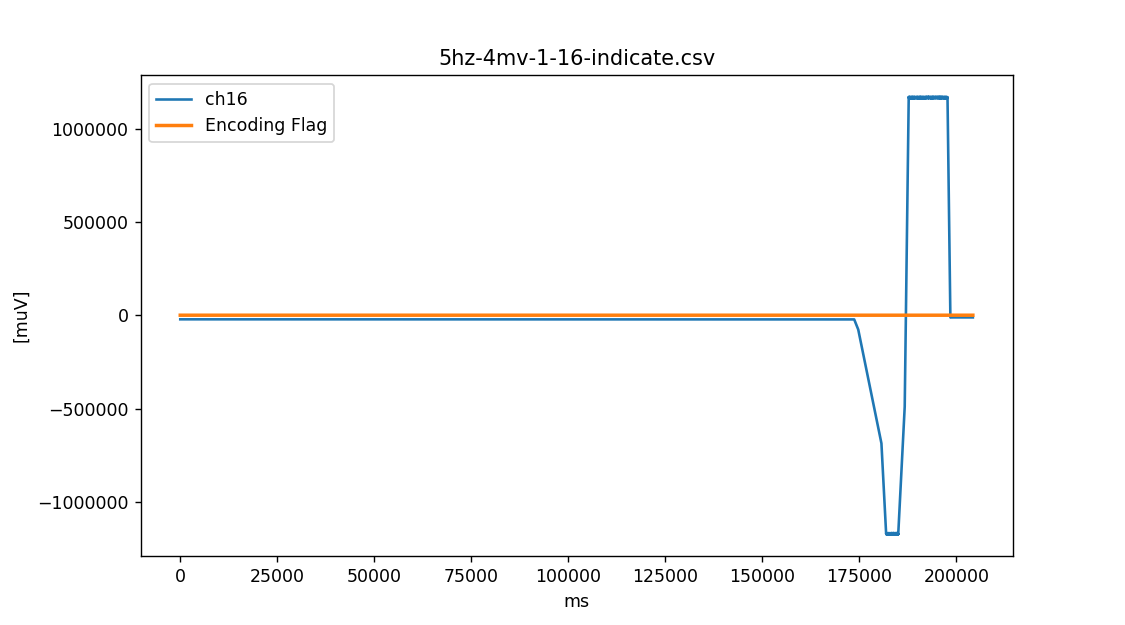

In [25]:
fig, ax = plt.subplots(1,figsize=(9,5))
chN = 16

plot_eeg_debugging_data(fn= "5hz-4mv-1-16-indicate.csv",
                        interval = 6,
                        ylabel="[muV]",
                        ax=ax,
                        ch=f"ch{chN}",
                        params={"enc":False,"enc_f":True,"title":True,"legend":False,"normalize":False}
                       )

<IPython.core.display.Javascript object>


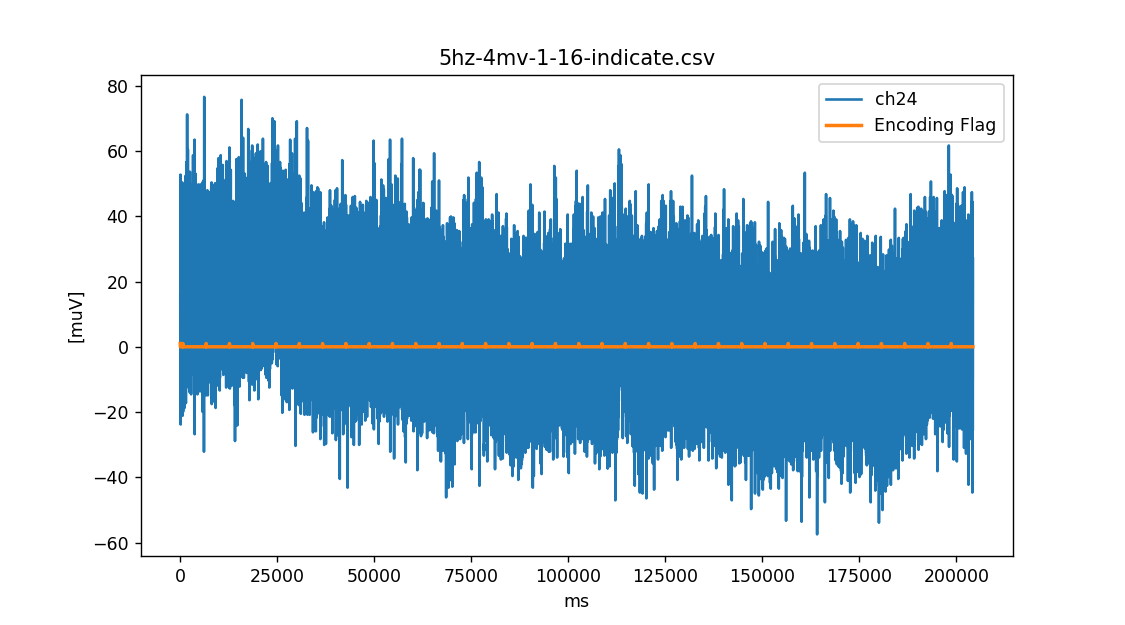

In [26]:
fig, ax = plt.subplots(1,figsize=(9,5))
chN = 24

plot_eeg_debugging_data(fn= "5hz-4mv-1-16-indicate.csv",
                        interval = 6,
                        ylabel="[muV]",
                        ax=ax,
                        ch=f"ch{chN}",
                        params={"enc":False,"enc_f":True,"title":True,"legend":False,"normalize":False}
                       )

### ```167 Hz, [3-5]mV, [4-20]Hz, Indications, Channel 1 Long Term ,  February 1st 2021```

<IPython.core.display.Javascript object>


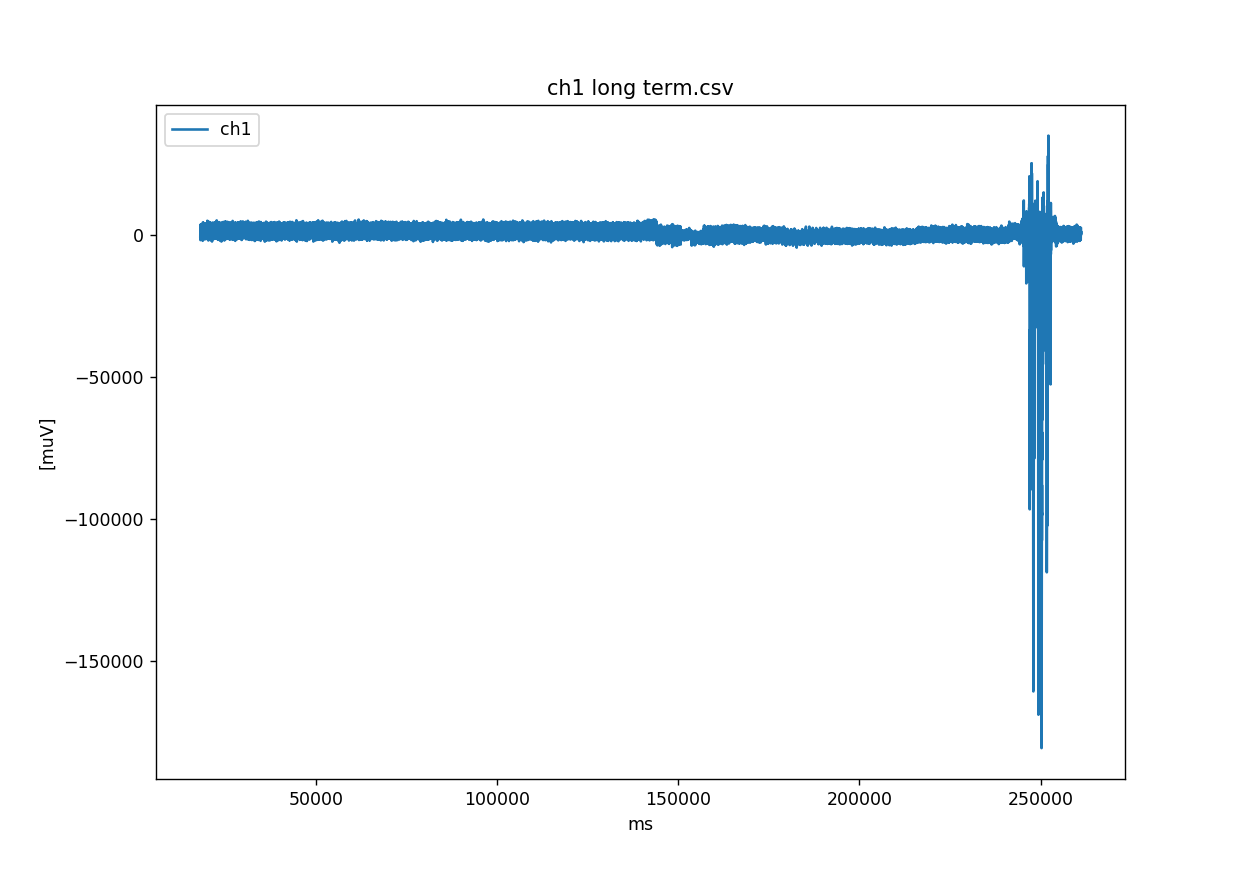

In [46]:
fig, ax = plt.subplots(1,figsize=(10,7))
chN = 1

plot_eeg_debugging_data(fn= "ch1 long term.csv",
                        interval = 6,
                        ylabel="[muV]",
                        ax=ax,
                        ch=f"ch{chN}",
                        params={"enc":False,"enc_f":False,"title":True,"legend":True,"normalize":False},
                        slize=[3000,-1])

### ```167 Hz, 4mV, 5Hz, Indications, Channel 1 Long Term 2,  February 1st 2021```

<IPython.core.display.Javascript object>


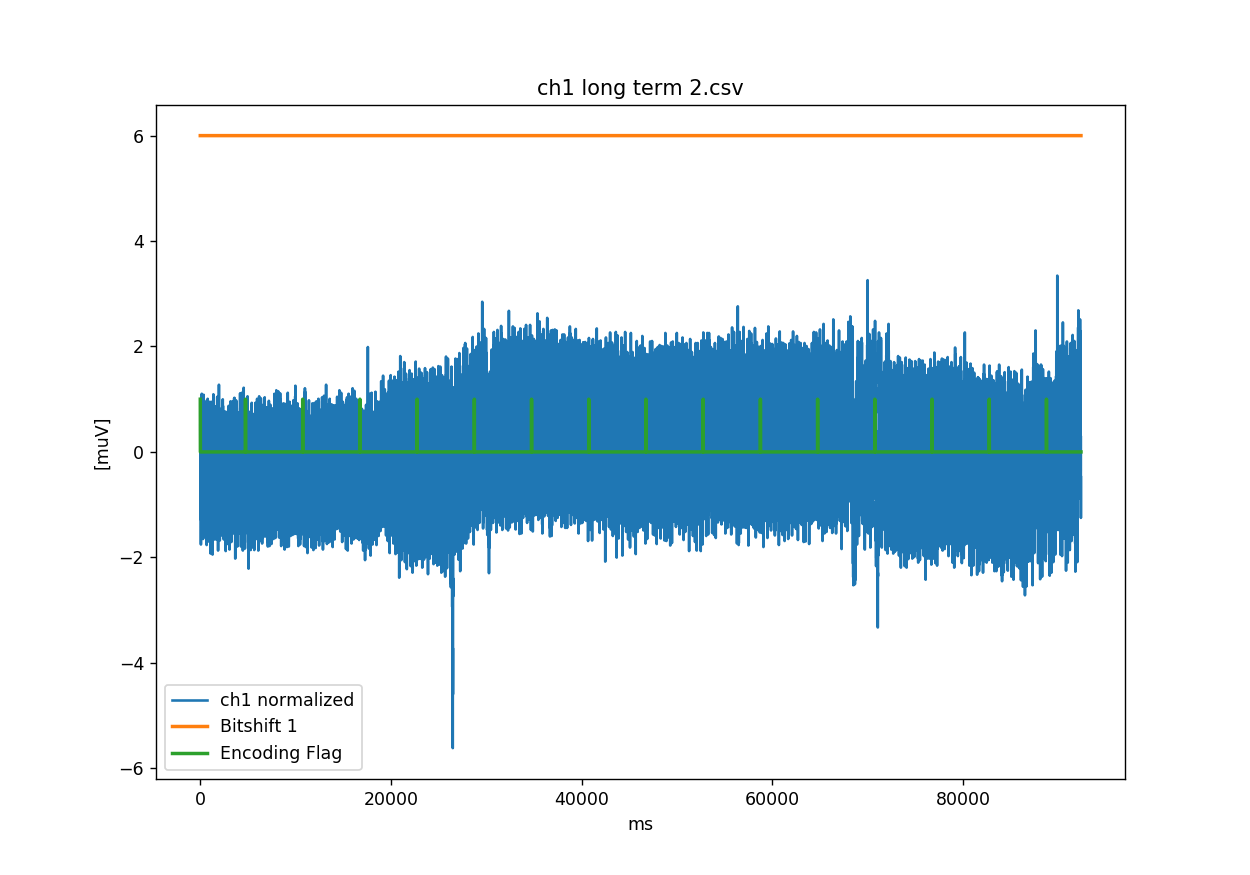

In [41]:
fig, ax = plt.subplots(1,figsize=(10,7))
chN = 1

plot_eeg_debugging_data(fn= "ch1 long term 2.csv",
                        interval = 6,
                        ylabel="[muV]",
                        ax=ax,
                        ch=f"ch{chN}",
                        params={"enc":True,"enc_f":True,"title":True,"legend":True,"normalize":True},
                        slize=[0,-1])

### ```167 Hz, 5mV, 5Hz, Filtering, Channel 1, Lowpass, Traumschreiber 3,February 2nd 2021```

<IPython.core.display.Javascript object>


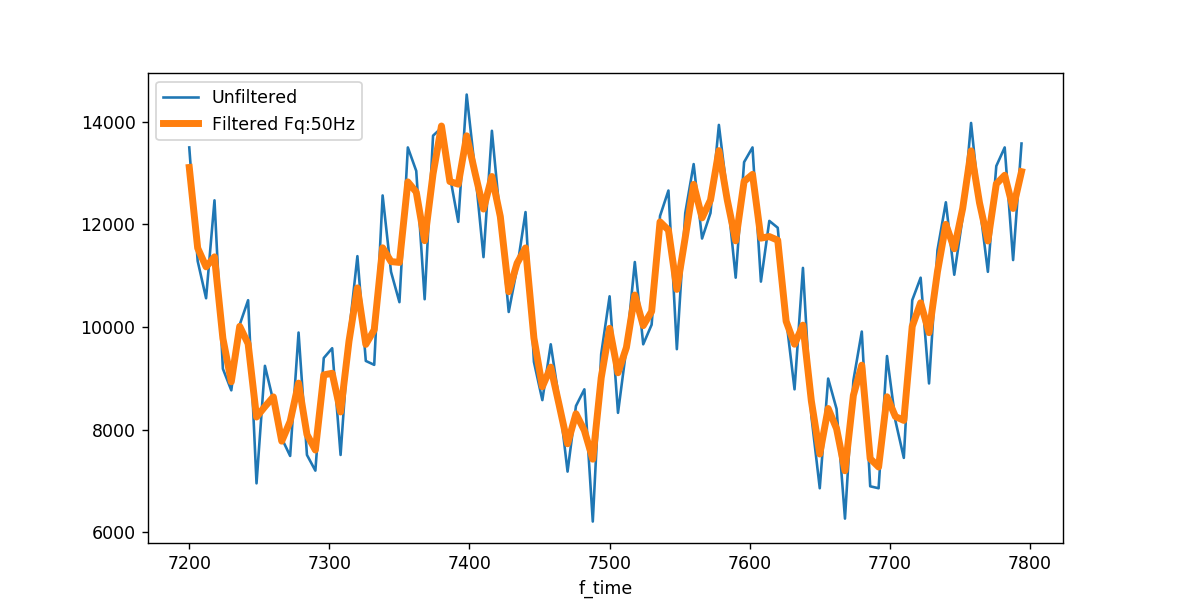

In [82]:
from scipy.signal import butter,filtfilt


data = preprocess_eeg_debugging_data("t3-c1-5mV-5Hz-30s-filter.csv",6)

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y


# Filter requirements.
T = 5.0         # Sample Period
fs = 167       # sample rate, Hz
cutoff = 50     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

y = butter_lowpass_filter(data["ch1"], cutoff, fs, order)


fig,ax = plt.subplots(1, figsize=(5,5))

a = 1200
b = 1300
y_slice = y[a:b]
data_slice = data[a:b]

data_slice.plot(y="ch1",x="f_time",ax=ax, label="Unfiltered")
ax.plot(data_slice["f_time"],y_slice, lw=4, label=f"Filtered Fq:{cutoff}Hz")
plt.legend()

<IPython.core.display.Javascript object>


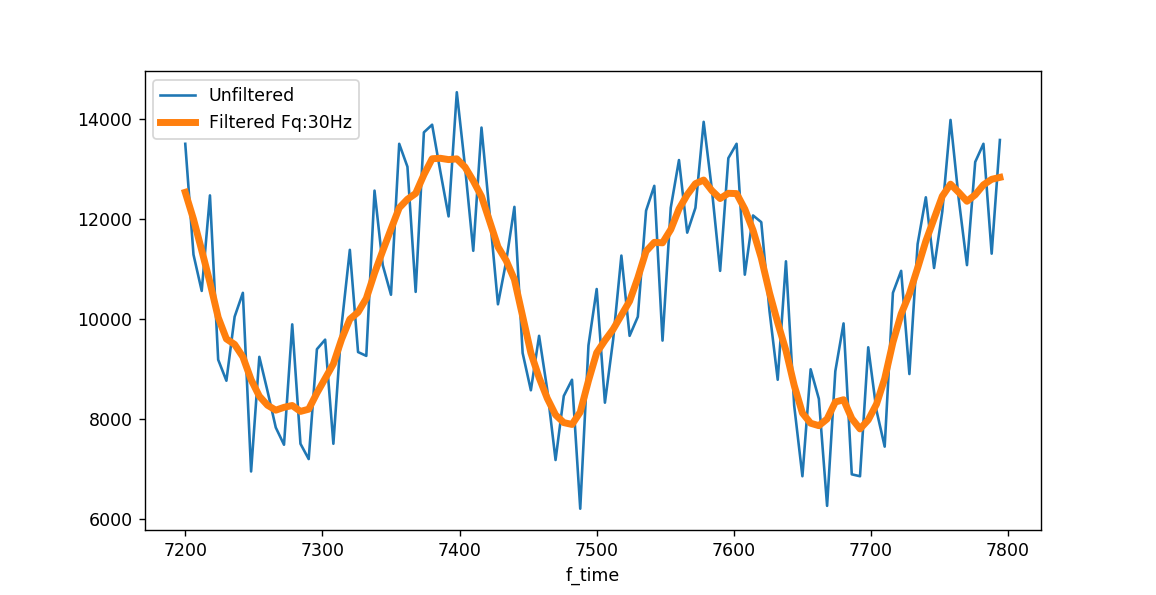

In [83]:
# Filter requirements.
T = 5.0         # Sample Period
fs = 167       # sample rate, Hz
cutoff = 30     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

y = butter_lowpass_filter(data["ch1"], cutoff, fs, order)


fig,ax = plt.subplots(1, figsize=(5,5))

a = 1200
b = 1300
y_slice = y[a:b]
data_slice = data[a:b]

data_slice.plot(y="ch1",x="f_time",ax=ax, label="Unfiltered")
ax.plot(data_slice["f_time"],y_slice, lw=4, label=f"Filtered Fq:{cutoff}Hz")
plt.legend()

<IPython.core.display.Javascript object>


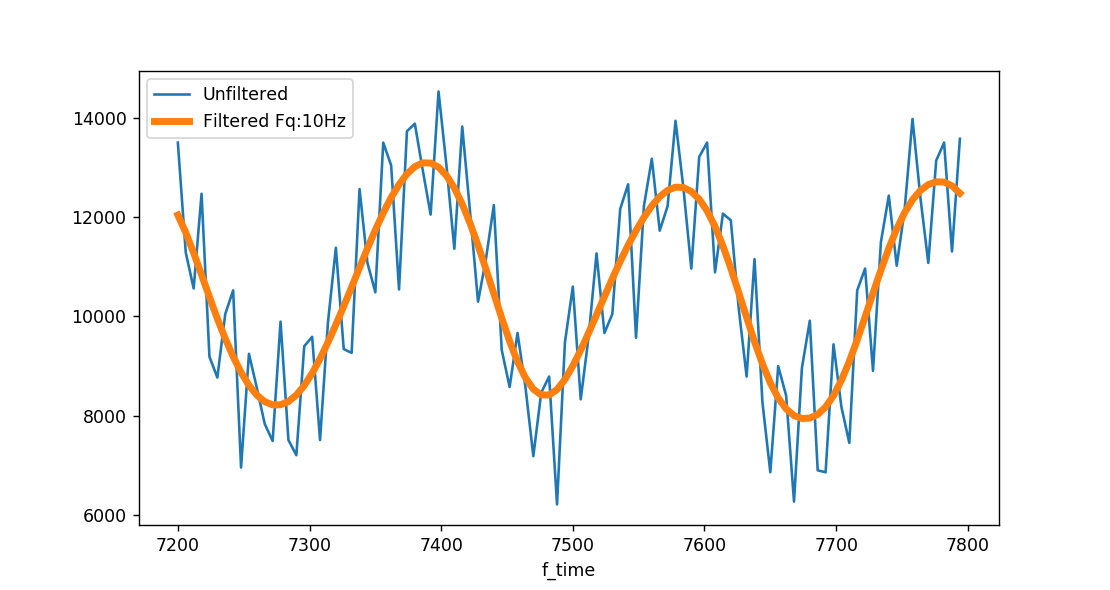

In [84]:
# Filter requirements.
T = 5.0         # Sample Period
fs = 167       # sample rate, Hz
cutoff = 10     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

y = butter_lowpass_filter(data["ch1"], cutoff, fs, order)


fig,ax = plt.subplots(1, figsize=(5,5))

a = 1200
b = 1300
y_slice = y[a:b]
data_slice = data[a:b]

data_slice.plot(y="ch1",x="f_time",ax=ax, label="Unfiltered")
ax.plot(data_slice["f_time"],y_slice, lw=4, label=f"Filtered Fq:{cutoff}Hz")
plt.legend()

### ```167 Hz, 5mV, 5Hz, No-filtering, Channel 1,Lowpass, Traumschreiber 4 Filtered, February 2nd 2021```

<IPython.core.display.Javascript object>


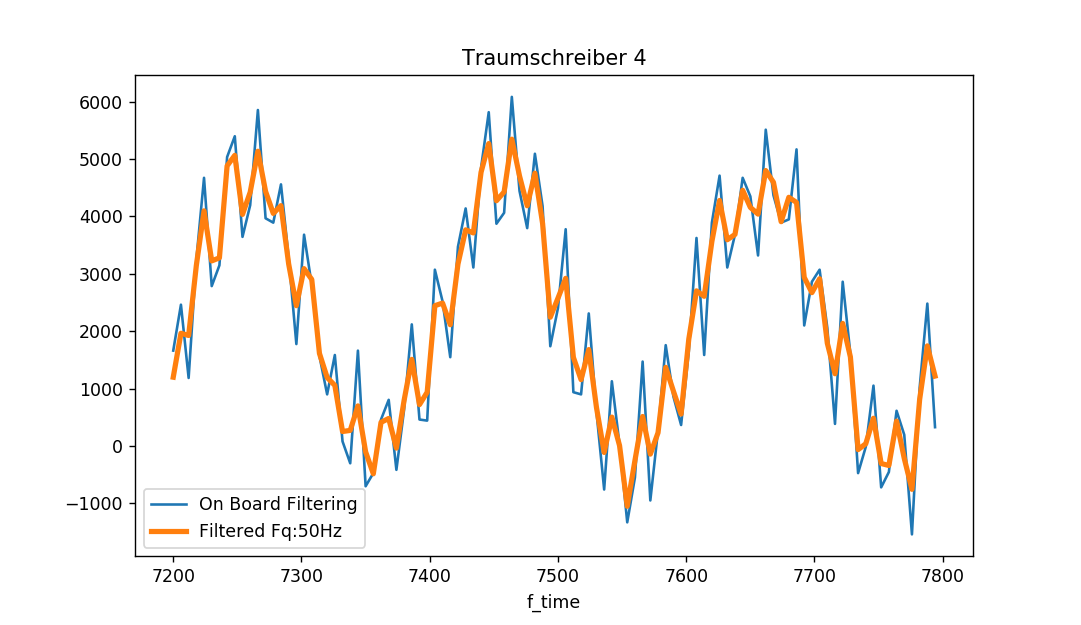

In [8]:
data = preprocess_eeg_debugging_data("t4-c1-5mV-5Hz-30s-filter.csv",6)
# Filter requirements.
T = 5.0         # Sample Period
fs = 167       # sample rate, Hz
cutoff = 50     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

y = butter_lowpass_filter(data["ch1"], cutoff, fs, order)


fig,ax = plt.subplots(1, figsize=(5,5))

a = 1200
b = 1300
y_slice = y[a:b]
data_slice = data[a:b]

data_slice.plot(y="ch1",x="f_time",ax=ax, label="On Board Filtering")
ax.plot(data_slice["f_time"],y_slice, lw=3, label=f"Filtered Fq:{cutoff}Hz")
plt.gca().set_title("Traumschreiber 4")
plt.legend()


<IPython.core.display.Javascript object>


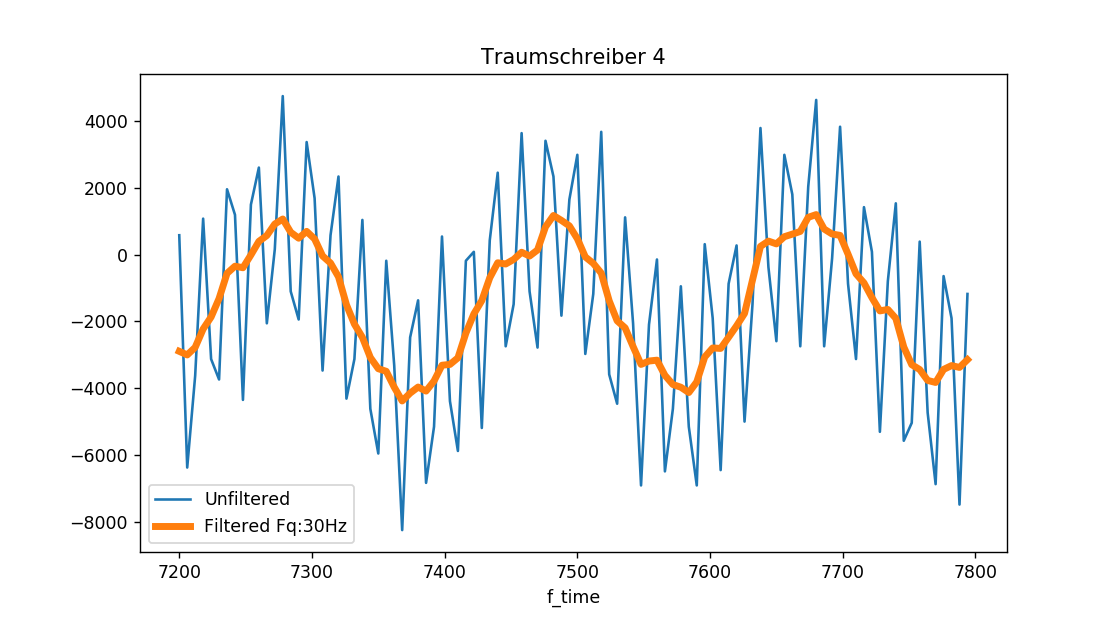

In [92]:
data = preprocess_eeg_debugging_data("t4-c1-5mV-5Hz-30s-no_filter.csv",6)
# Filter requirements.
T = 5.0         # Sample Period
fs = 167       # sample rate, Hz
cutoff = 30     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

y = butter_lowpass_filter(data["ch1"], cutoff, fs, order)


fig,ax = plt.subplots(1, figsize=(5,5))

a = 1200
b = 1300
y_slice = y[a:b]
data_slice = data[a:b]

data_slice.plot(y="ch1",x="f_time",ax=ax, label="Unfiltered")
ax.plot(data_slice["f_time"],y_slice, lw=4, label=f"Filtered Fq:{cutoff}Hz")
plt.gca().set_title("Traumschreiber 4")
plt.legend()


<IPython.core.display.Javascript object>


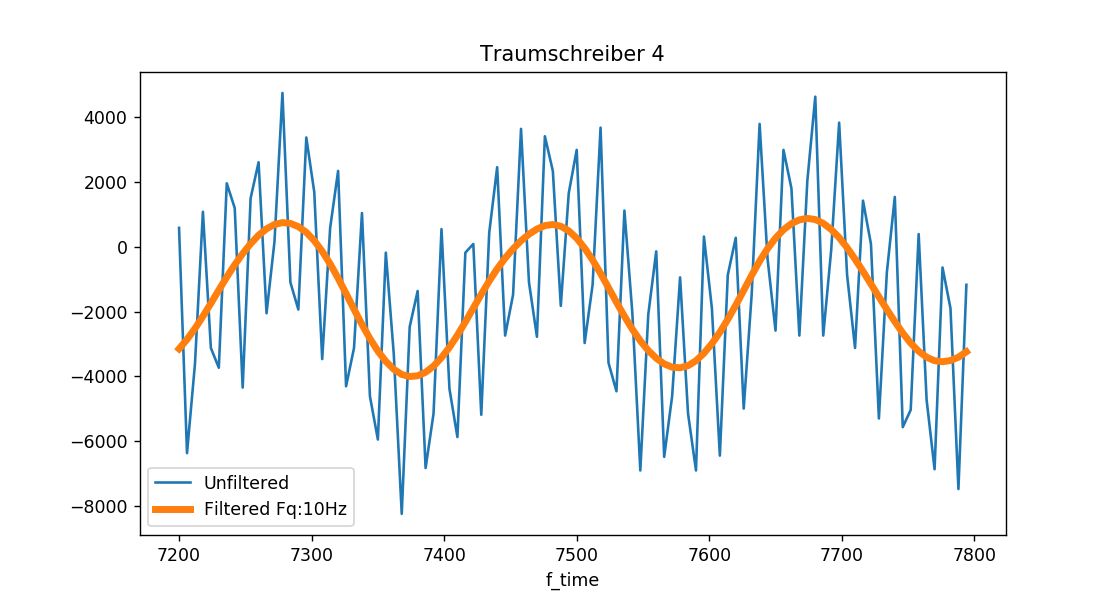

In [93]:
data = preprocess_eeg_debugging_data("t4-c1-5mV-5Hz-30s-no_filter.csv",6)
# Filter requirements.
T = 5.0         # Sample Period
fs = 167       # sample rate, Hz
cutoff = 50     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

y = butter_lowpass_filter(data["ch1"], cutoff, fs, order)


fig,ax = plt.subplots(1, figsize=(5,5))

a = 1200
b = 1300
y_slice = y[a:b]
data_slice = data[a:b]

data_slice.plot(y="ch1",x="f_time",ax=ax, label="Unfiltered")
ax.plot(data_slice["f_time"],y_slice, lw=4, label=f"Filtered Fq:{cutoff}Hz")
plt.gca().set_title("Traumschreiber 4")
plt.legend()


### ```167 Hz, 5mV, 5Hz, No-filtering, Channel 1,Lowpass, Traumschreiber 4, February 2nd 2021```

In [1]:
data = preprocess_eeg_debugging_data("t4-c1-5mV-5Hz-30s-filter.csv",6)
# Filter requirements.
T = 5.0         # Sample Period
fs = 167       # sample rate, Hz
cutoff = 50     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

y = butter_lowpass_filter(data["ch1"], cutoff, fs, order)


fig,ax = plt.subplots(1, figsize=(5,5))

a = 1200
b = 1300
y_slice = y[a:b]
data_slice = data[a:b]

data_slice.plot(y="ch1",x="f_time",ax=ax, label="Unfiltered")
ax.plot(data_slice["f_time"],y_slice, lw=4, label=f"Filtered Fq:{cutoff}Hz")
plt.gca().set_title("Traumschreiber 4")
plt.legend()


NameError: name 'preprocess_eeg_debugging_data' is not defined

<IPython.core.display.Javascript object>


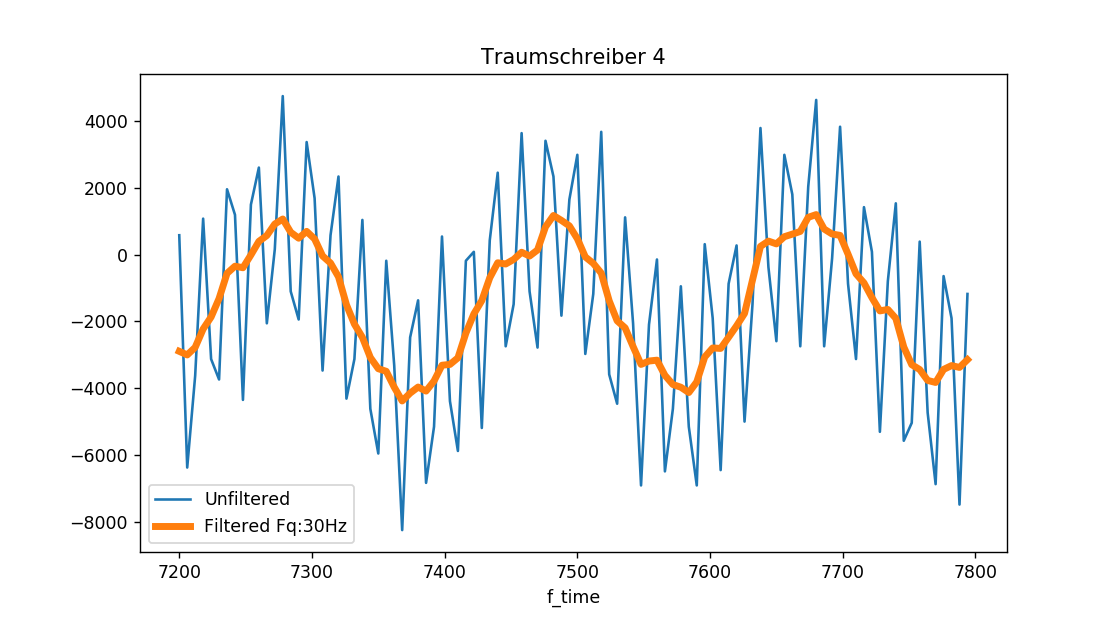

In [92]:
data = preprocess_eeg_debugging_data("t4-c1-5mV-5Hz-30s-no_filter.csv",6)
# Filter requirements.
T = 5.0         # Sample Period
fs = 167       # sample rate, Hz
cutoff = 30     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

y = butter_lowpass_filter(data["ch1"], cutoff, fs, order)


fig,ax = plt.subplots(1, figsize=(5,5))

a = 1200
b = 1300
y_slice = y[a:b]
data_slice = data[a:b]

data_slice.plot(y="ch1",x="f_time",ax=ax, label="Unfiltered")
ax.plot(data_slice["f_time"],y_slice, lw=4, label=f"Filtered Fq:{cutoff}Hz")
plt.gca().set_title("Traumschreiber 4")
plt.legend()


<IPython.core.display.Javascript object>


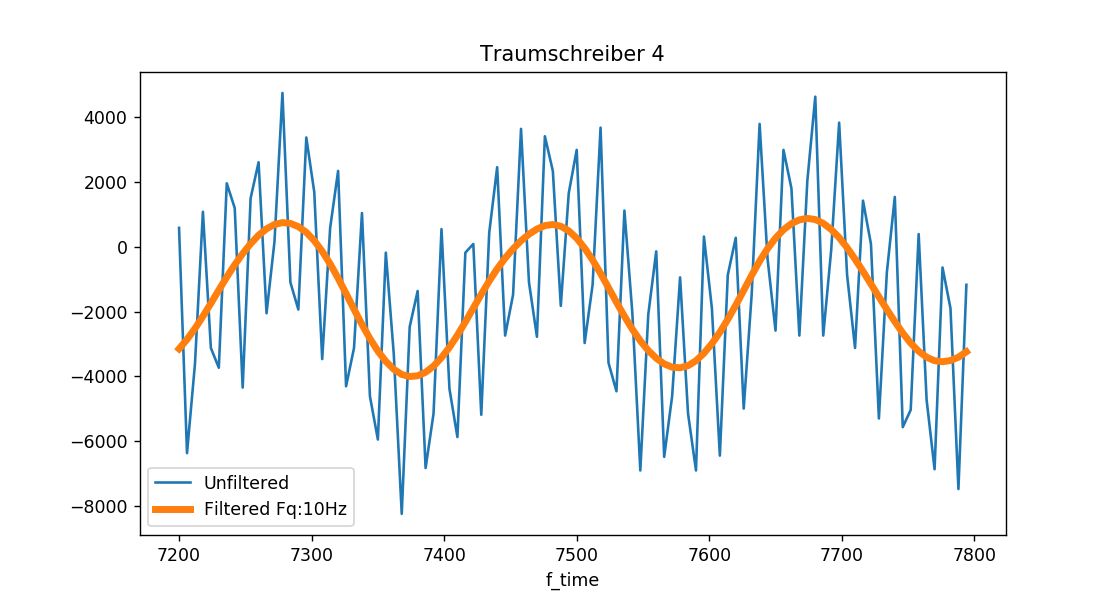

In [93]:
data = preprocess_eeg_debugging_data("t4-c1-5mV-5Hz-30s-no_filter.csv",6)
# Filter requirements.
T = 5.0         # Sample Period
fs = 167       # sample rate, Hz
cutoff = 50     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

y = butter_lowpass_filter(data["ch1"], cutoff, fs, order)


fig,ax = plt.subplots(1, figsize=(5,5))

a = 1200
b = 1300
y_slice = y[a:b]
data_slice = data[a:b]

data_slice.plot(y="ch1",x="f_time",ax=ax, label="Unfiltered")
ax.plot(data_slice["f_time"],y_slice, lw=4, label=f"Filtered Fq:{cutoff}Hz")
plt.gca().set_title("Traumschreiber 4")
plt.legend()


<IPython.core.display.Javascript object>


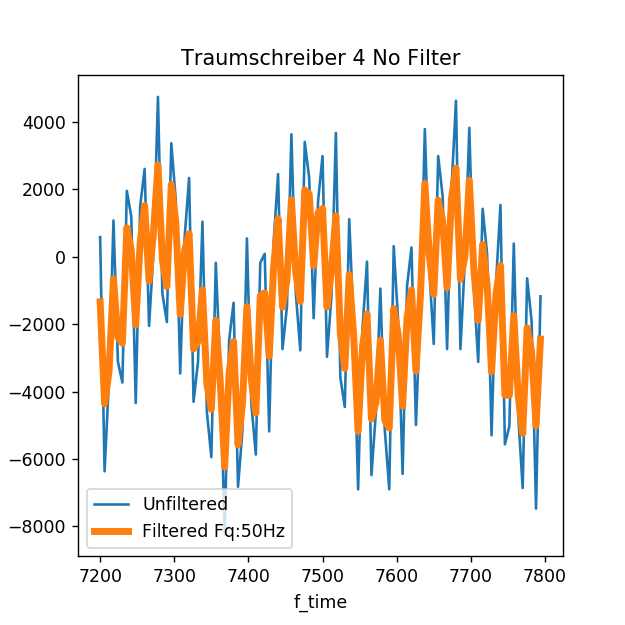

In [98]:

fig,ax = plt.subplots(1, figsize=(5,5))


def plot_buttersworth(fn, cutoff,ax, title="Traumschreiber"):
    data = preprocess_eeg_debugging_data("t4-c1-5mV-5Hz-30s-no_filter.csv",6)
    # Filter requirements.
    T = 5.0         # Sample Period
    fs = 167       # sample rate, Hz
    cutoff = cutoff    # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
    nyq = 0.5 * fs  # Nyquist Frequency
    order = 2       # sin wave can be approx represented as quadratic
    n = int(T * fs) # total number of samples

    y = butter_lowpass_filter(data["ch1"], cutoff, fs, order)
    a = 1200
    b = 1300
    y_slice = y[a:b]
    data_slice = data[a:b]

    data_slice.plot(y="ch1",x="f_time",ax=ax, label="Unfiltered")
    ax.plot(data_slice["f_time"],y_slice, lw=4, label=f"Filtered Fq:{cutoff}Hz")
    plt.gca().set_title(title)
    ax.legend()
    
plot_buttersworth("t4-c1-5mV-5Hz-30s-no_filter.csv", 50, ax, title="Traumschreiber 4 No Filter")

### ```167 Hz, 5mV, 5Hz, No-filtering, Channel 1,Lowpass, Traumschreiber 7, February 2nd 2021```

<IPython.core.display.Javascript object>


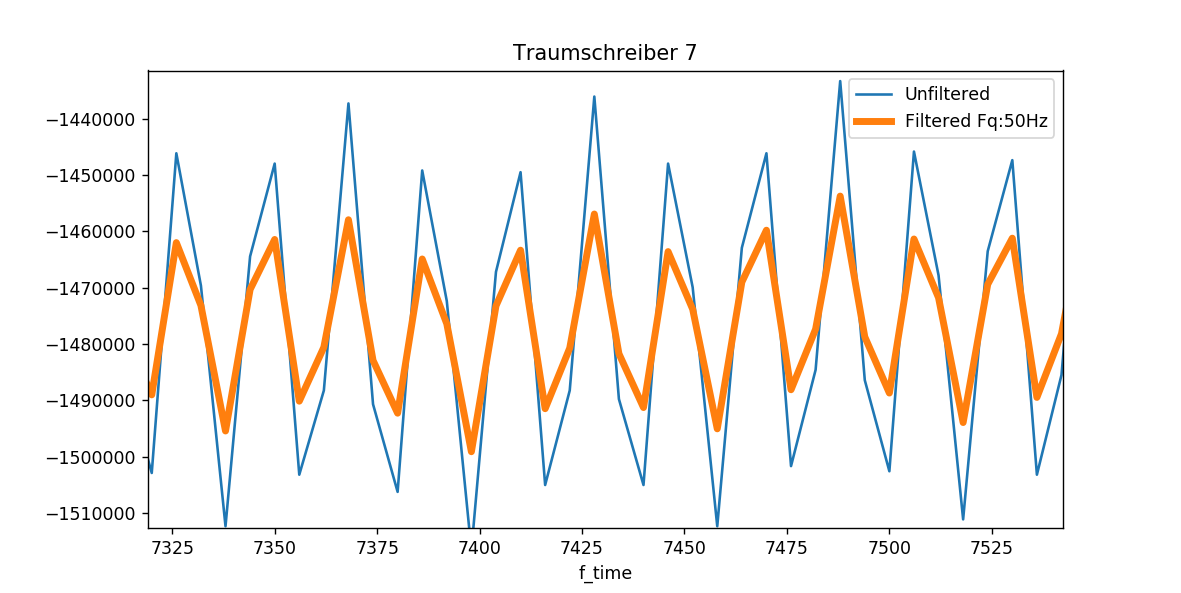

In [104]:
fig,ax = plt.subplots(1,figsize=(7,5))
plot_buttersworth(fn="02-02-2021_15-51-19_t7-c1-5mv-5hz-no-filtering-30s.csv", cutoff=50, ax=ax, title="Traumschreiber 7")

<IPython.core.display.Javascript object>


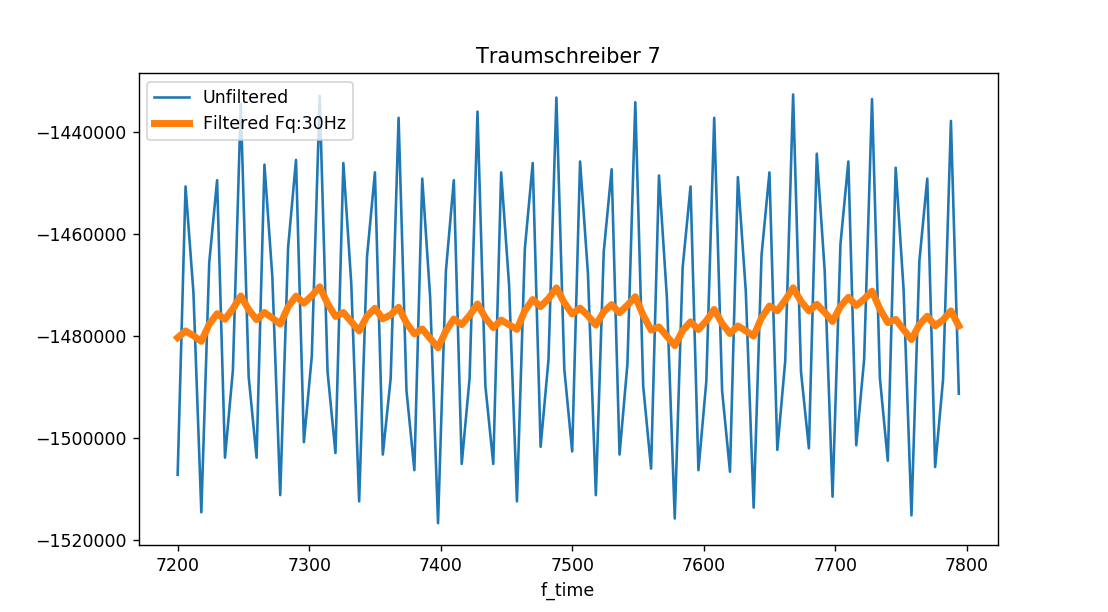

In [105]:
fig,ax = plt.subplots(1,figsize=(7,5))
plot_buttersworth(fn="02-02-2021_15-51-19_t7-c1-5mv-5hz-no-filtering-30s.csv", cutoff=30, ax=ax, title="Traumschreiber 7")

<IPython.core.display.Javascript object>


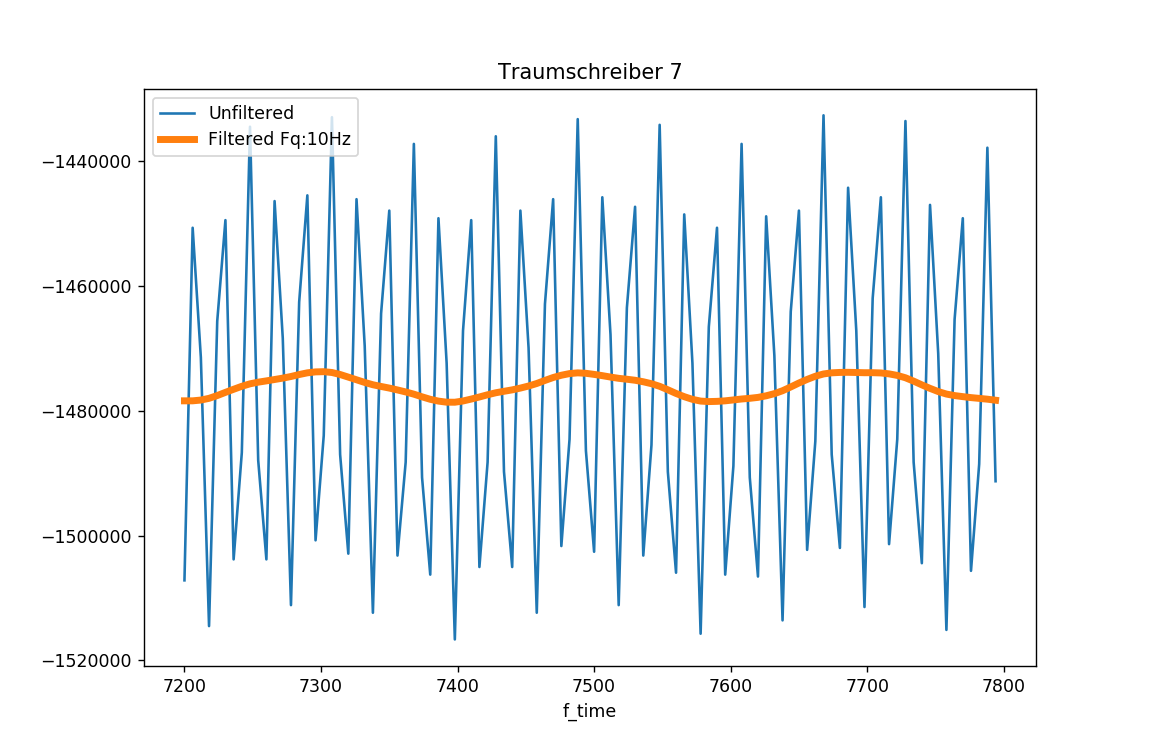

In [107]:
fig,ax = plt.subplots(1,figsize=(7,5))
plot_buttersworth(fn="02-02-2021_15-51-19_t7-c1-5mv-5hz-no-filtering-30s.csv", cutoff=10, ax=ax, title="Traumschreiber 7")

<IPython.core.display.Javascript object>


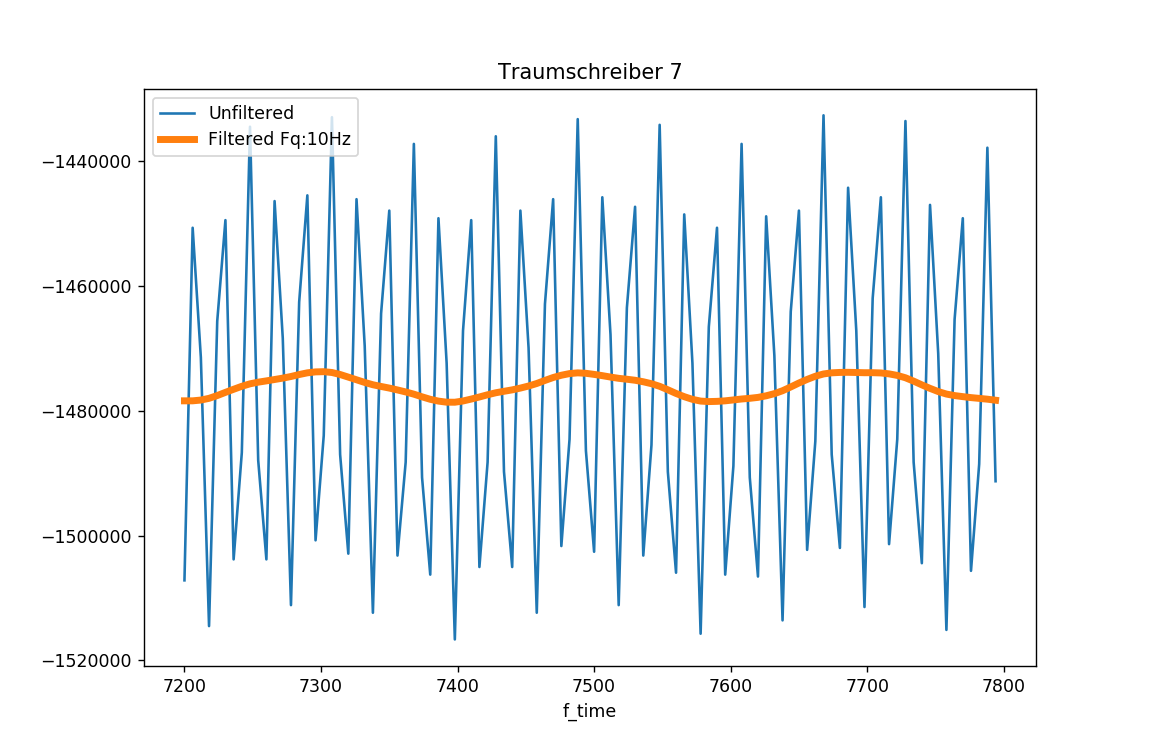

In [107]:
fig,ax = plt.subplots(1,figsize=(7,5))
plot_buttersworth(fn="c8-5mv-5hz-no-filtering-30s.csv", cutoff=10, ax=ax, title="Traumschreiber 4 Filtering")

### ```167 Hz, 5mV, 5Hz, No-filtering, Dual 8 & 24 ,Lowpass, Traumschreiber 7,, February 2nd 2021```

<IPython.core.display.Javascript object>


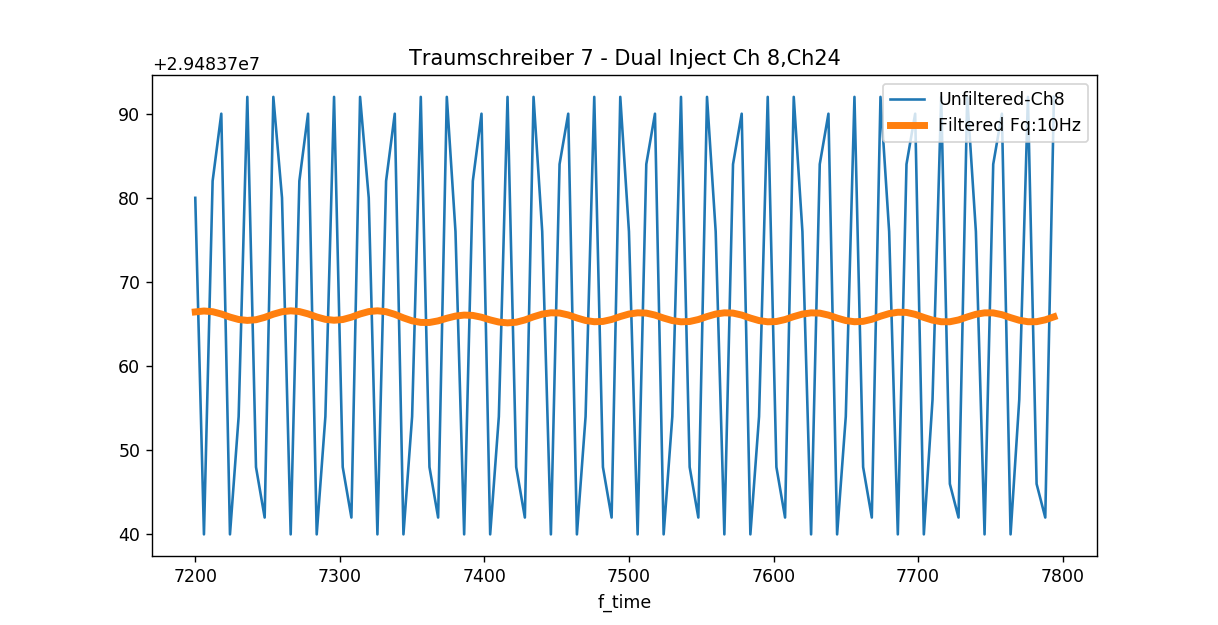

In [24]:
fig,ax = plt.subplots(1,figsize=(7,5))
plot_buttersworth(fn="t7-c24-5mv-5hz-no-filtering-30s-dualinject.csv", cutoff=10, ax=ax,filtered="Unfiltered-Ch8", 
                  title="Traumschreiber 7 - Dual Inject Ch 8,Ch24", ch="ch8")

<IPython.core.display.Javascript object>


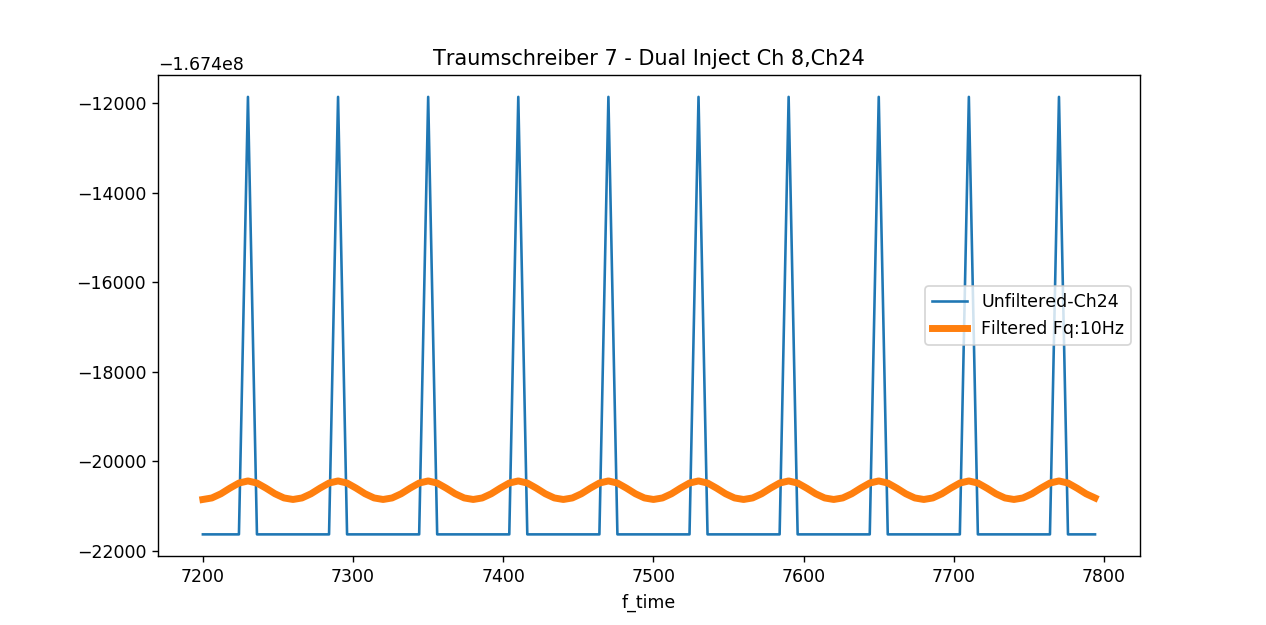

In [29]:
fig,ax = plt.subplots(1,figsize=(7,5))
plot_buttersworth(fn="t7-c24-5mv-5hz-no-filtering-30s-dualinject.csv",
                  cutoff=10,
                  ax=ax,
                  filtered="Unfiltered-Ch24", 
                  title="Traumschreiber 7 - Dual Inject Ch 8,Ch24",
                  ch="ch24")

### ```167 Hz, 5mV, 5Hz, Filter 30s,Ch1, Traumschreiber 9, February 7th 2021```

<IPython.core.display.Javascript object>


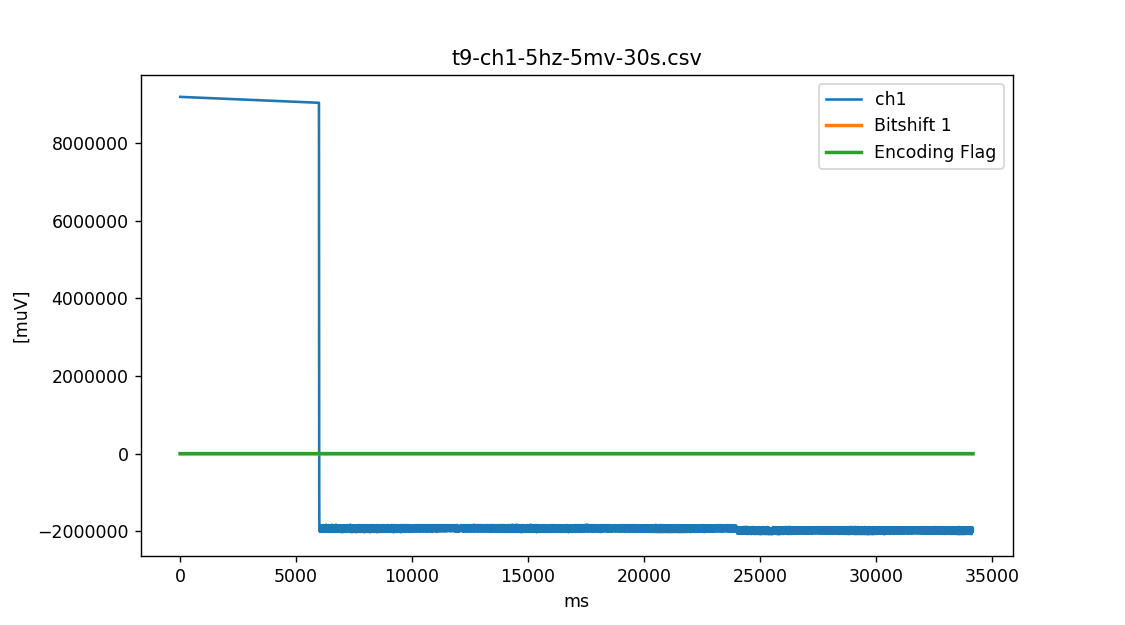

In [32]:
fig, ax = plt.subplots(1,figsize=(9,5))
chN = 1

plot_eeg_debugging_data(fn= "t9-ch1-5hz-5mv-30s.csv",
                        interval = 6,
                        ylabel="[muV]",
                        ax=ax,
                        ch=f"ch{chN}",
                        params={"enc":True,"enc_f":True,"title":True,"legend":True,"normalize":False}
                       )

### ```Traumschreiber 3 [Ch1, Ch10, Ch24], 4mV, 5Hz, Default Filter, February 17th 2021```

<IPython.core.display.Javascript object>


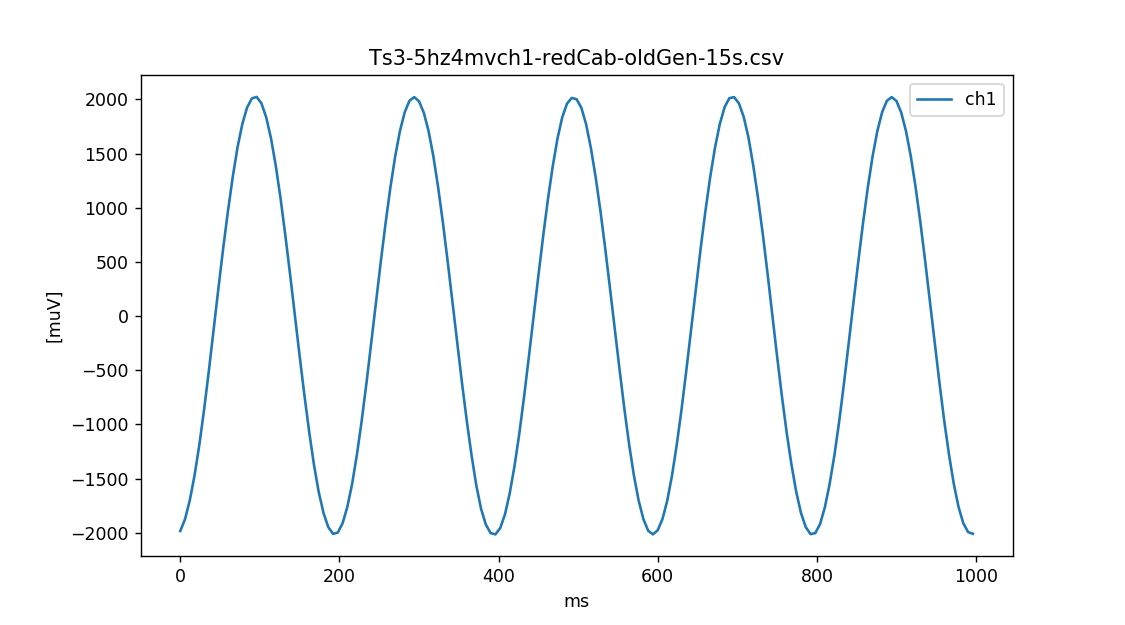

In [95]:
fn = "Ts3-5hz4mvch1-redCab-oldGen-15s.csv"
plot_eeg_debugging_data(fn,interval=6,ax=None, ylabel="[muV]",
                            time="f_time",ch="ch1",slize=[0,167],
                            params={"enc":False,
                                    "enc_f":False,
                                    "title":True,
                                    "legend":True,
                                    "normalize":False})

<IPython.core.display.Javascript object>


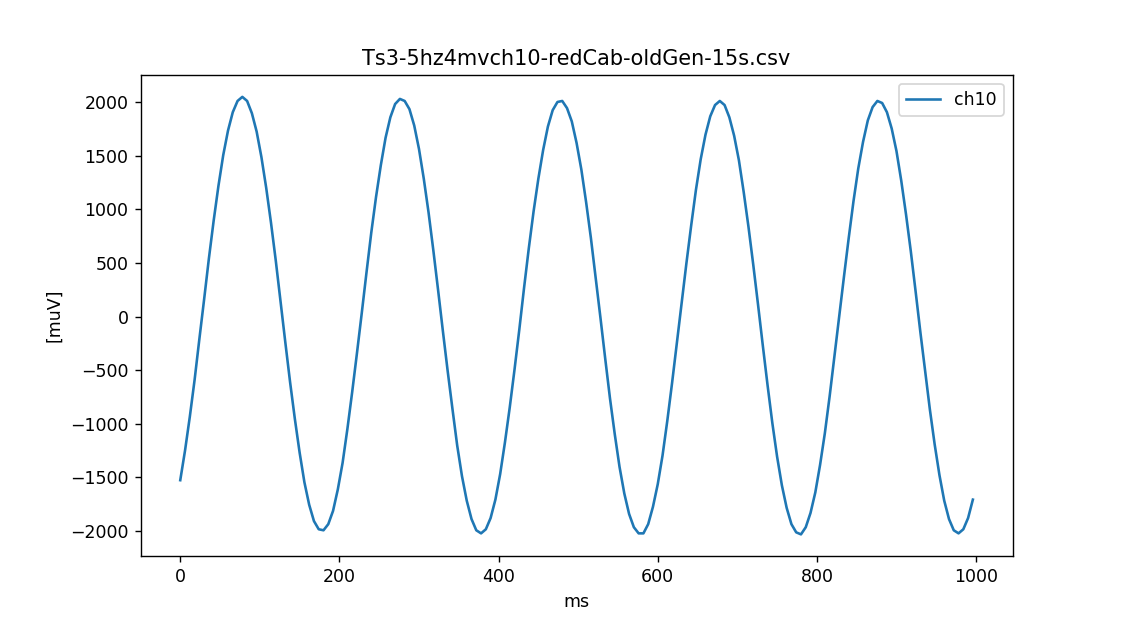

In [20]:
fn = "Ts3-5hz4mvch10-redCab-oldGen-15s.csv"
plot_eeg_debugging_data(fn,interval=6,ax=None, ylabel="[muV]",
                            time="f_time",ch="ch10",slize=[0,167],
                            params={"enc":False,
                                    "enc_f":False,
                                    "title":True,
                                    "legend":True,
                                    "normalize":False})
plot_spectrogram()

<IPython.core.display.Javascript object>


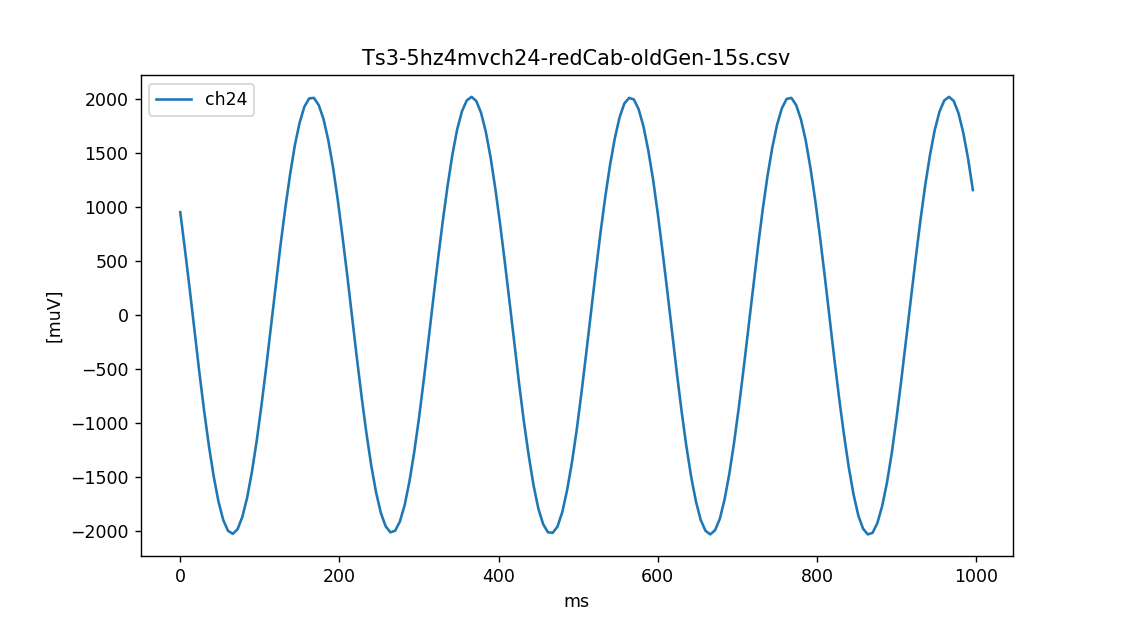

In [21]:
fn = "Ts3-5hz4mvch24-redCab-oldGen-15s.csv"
plot_eeg_debugging_data(fn,interval=6,ax=None, ylabel="[muV]",
                            time="f_time",ch="ch24",slize=[0,167],
                            params={"enc":False,
                                    "enc_f":False,
                                    "title":True,
                                    "legend":True,
                                    "normalize":False})

<IPython.core.display.Javascript object>


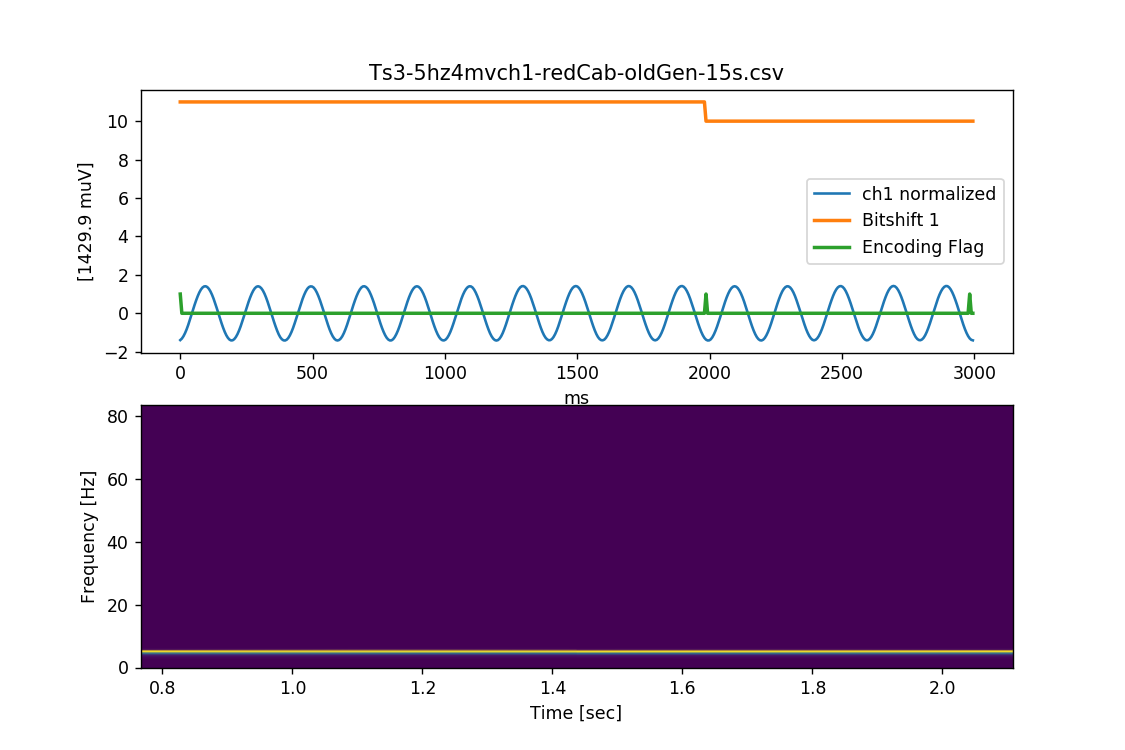

In [111]:
ch=1
fn = f"Ts3-5hz4mvch{ch}-redCab-oldGen-15s.csv"
plot_spectrosignal(fn,ch=f'ch{ch}', slize=[0,500],figsize=(9,6))

<IPython.core.display.Javascript object>


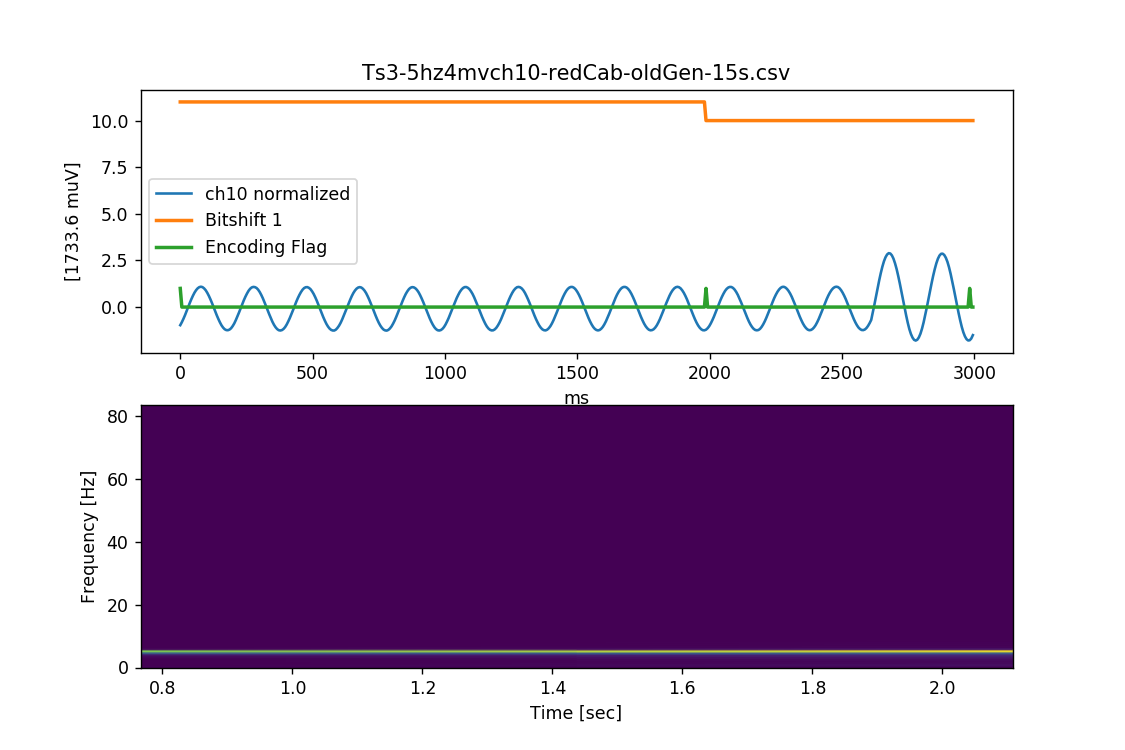

In [109]:
ch=10
fn = f"Ts3-5hz4mvch{ch}-redCab-oldGen-15s.csv"
plot_spectrosignal(fn,ch=f'ch{ch}', slize=[0,500],figsize=(9,6))

<IPython.core.display.Javascript object>


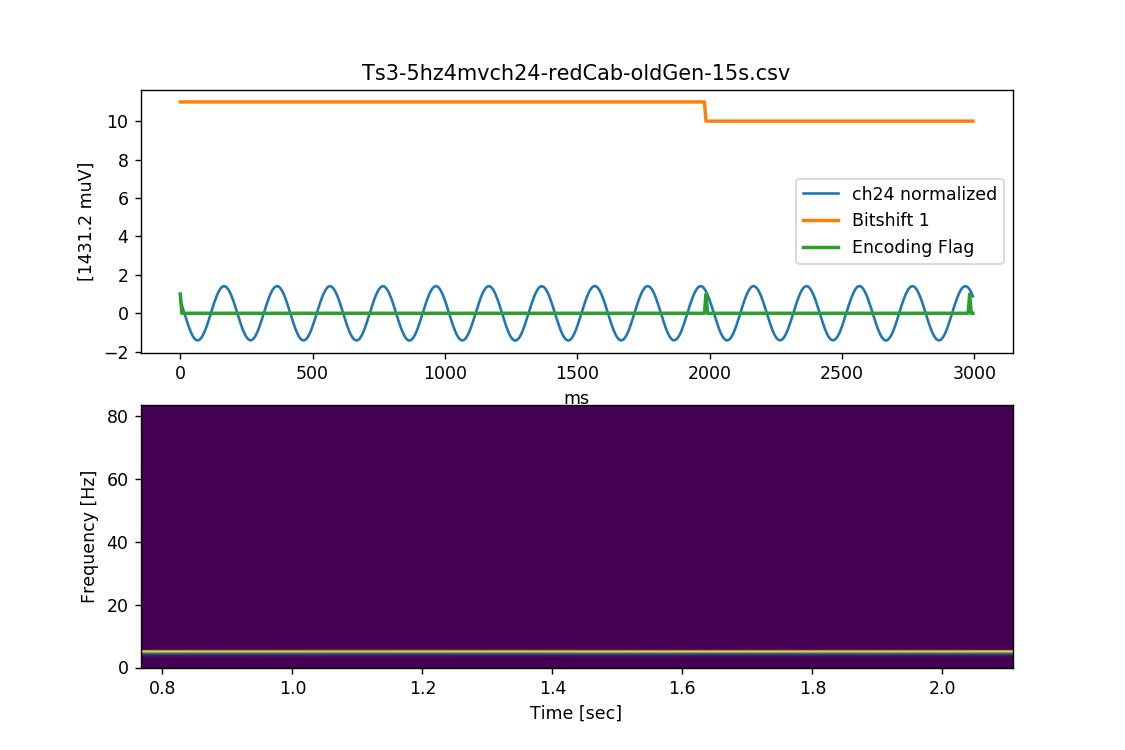

In [112]:
ch=24
fn = f"Ts3-5hz4mvch{ch}-redCab-oldGen-15s.csv"
plot_spectrosignal(fn,ch=f'ch{ch}', slize=[0,500],figsize=(9,6))

## March

In [1]:
plot_eeg_debugging_data("12-03-2021_14-32-45_drift_ecg_2a_HP(O8O2)_LP(L45_O4)_Notch(H54O4).csv")

NameError: name 'plot_eeg_debugging_data' is not defined

In [9]:
plot_eeg_debugging_data("EEGDroid Inspect (1).ipynbcsv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/EEGDroid Inspect (1).ipynbcsv'

<IPython.core.display.Javascript object>


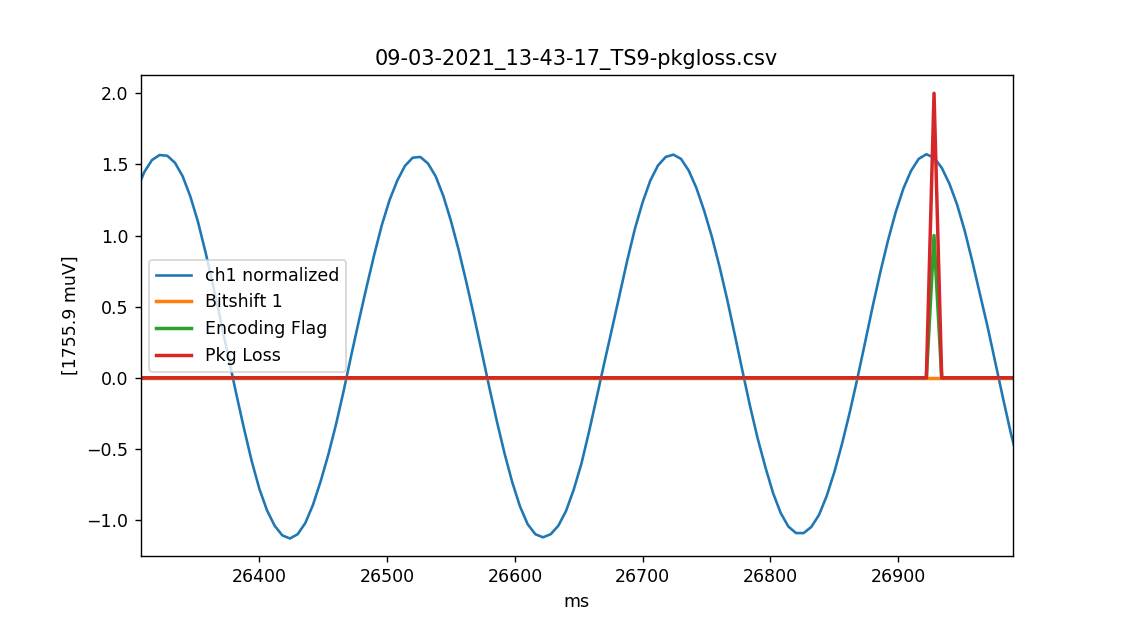

In [27]:
plot_eeg_debugging_data("09-03-2021_13-43-17_TS9-pkgloss.csv")

<IPython.core.display.Javascript object>


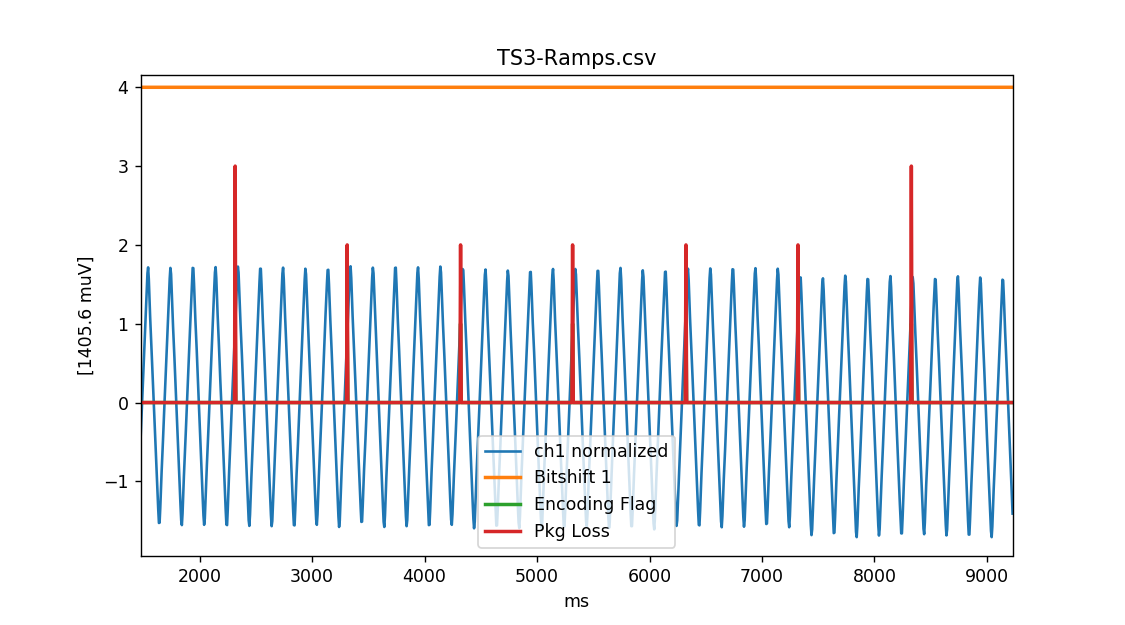

In [34]:
plot_eeg_debugging_data("TS3-Ramps.csv")